# Case Study 3

#### Dhruba Dey, Josh Eysenbach, Anish Patel, Sreeni Prabhala
#### June 7, 2021

### Abstract

This case study involves a text analysis of several thousand emails to create a model that identifies spam. The final model uses a Naïve Bayes classification method on a subset of possible features in an email body to quickly identify spam with approximately 97.5% accuracy.

### 1   Introduction

Spam is a term for unsolicited email (and now other forms of messaging) that has plagued inboxes for virtually as long as email has existed. The label of 'spam' is believed to have originated from a reference to an episode of *Monty Python’s Flying Circus* that aired in the 1970s involving a restaurant menu of items with ever-increasing contents of the ubiquitous canned preserved meat known as spam [1]. The term fits well to describe the potentially overwhelming pervasive presence of these unwanted, and often malicious, emails.

According to spamlaws.com, 14.5 billion messages globally per day, or approximately 45% of all emails (or more according to certain research firms) are considered spam. The types of spam range from relatively harmless but annoying advertising, to 'phishing' scams that attempt to gather sensitive personal information, to malware that can install critically harmful programs capable of crashing networks or stealing data. Email filters designed to block or delete spam are absolutely essential and constantly tested by those trying to penetrate the inboxes of both business and personal accounts over the globe. Even with these security measures in place, some research firms estimate that the annual losses due to both productivity interruption and technical expenses to deal with spam amount to over $20 billion [2].

The case study analysis examines thousands of sample emails that have been indentified as either normal correspondence or spam and attempts to build a model that can classify the emails correctly using the text body data. 


### 2   Methods

We received 5 folders containing email text – *spam*, *spam_2*, *easy_ham*, *easy_ham2* and *hard_ham* – to extract the information to construct the dataset. Most of the files were in either plaintext or html format, and we used the text type “iso-8859-1”and the *BeautifulSoup* package to parse the text and html files, respectively. In addition, we were marking each file either spam or ham (non-spam) based on the folders from which the files were being downloaded to create the target variable. Many files were empty, and some were hard to parse. However, we could successfully process around 26% (2381 out of 9353) of the files, which gave us a decent number of observations to build a workable model. 

Our next concern was whether the data was balanced or not because we did not have the luxury of a huge dataset to manipulate the unbalancing situation where we might need to sacrifice a chunk of training data to balance the dataset. But it turned out that the dataset is quite balanced and no further remedial action is required from that standpoint. 

We thought the spam emails were short and the length of the text content would provide us some clue or separate distributions to categorize the emails as ham or spam, but it did not. In fact, the distributions of ham and spam are almost the same, thereby indicating that ham and spam emails are undistinguishable based on their content size. 

We switched our focus to clean the text into a bag of words, which we could leverage to build our model. We took the following steps to accomplishthis task. 
1.      Took out all characters besides lower and uppercase English letters. 
2.      Converted all letters to lower case. 
3.      Split each string to a list of words.
4.      Removed the stop words from each list.
5.      Stemmed the words in each list using the *Porterstemmer*.
6.      Lemmatized the words in each list to consolidate as much as possible to the root words to avoid extra features. Used the Wordnet *Lemmatizer*. 

After going through these steps and creating cleaned word lists, we wanted to know the top 20 most words for ham and spam emails. We found these top 20 words are either very common or meaningless as many of these are single letters such as e, c, b etc.  or technical words such as com, http, email, click etc. or very common words such as get, use etc. Secondly, there are many overlapping words between ham and spam. This demonstrated that these words would not help in differentiating emails as to ham or spam, besides the frequency of their occurrence, which matters when it comes to probabilistic learning. 

In order to enhance the quality of the bag of words, we wanted to capture only the medium and the long words with word lengths greater than 6.The top 20-word lists for ham and spam changed drastically, and these words were meaningful and provided us with a good variation in terms of word content and their respective frequencies. Unique word counts after eliminating short words in ham and spam stood at 70443 and 49842, respectively. We believed that these volumes of unique word counts would be adequate.

In initial attempts at building the model we did not find all suitable options in the Count-Vectorizer to perform tasks needed to clean the word strings. Therefore, we developed our own methods to conduct these tasks outside of the Count-Vectorizer and then split data for the train and the test utilizing k-fold methods. However, we eventually leveraged the Count-Vectorizer to generate the data structure needed for the model construction.

We deliberated on whether we should consider these features random and independent to undertake the Naïve Bayes algorithm. Since we uncluttered the word list, after removing stop words and stemming and lemmatizing the words, with quality words of higher size, we could tentatively assume the conditional independence between the features in the evidence given the level of the target feature, which makes the Naïve Bayes model relatively robust to data fragmentation and the curse of dimensionality. However, we would only take the top 2% - 5% of the training features for classification because these top words have the highest correlations and the loss function decayed exponentially with the inclusion of more features.

We chose the Multinomial and the Bernoulli Naïve Bayes models because the Multinomial classifier is suitable for classification with discrete features with integer counts and the Bernoulli classifier has the similar characteristics as those of the Multinomial but is used for binary classification as needed for our model classification.

Finally, we cross-checked the results of Naïve Bayes with the Logistic Regression. We also ran Logistic Regression to determine the top 30 words that would influence the classification, as this is useful for interpretation of what words are high determinants of spam.

### 3   Results

The first model was attempted using 1500 features (approximately 2.1% of the total feature count) to get a baseline for running time and accuracy. The first model resulted in an accuracy of 95.8%. The final model increased the number of included features to 4000 (approximately 5.6% of the total feature count) and increased the accuracy of correctly identified emails to 97.5%. The run time is increased by including more features, but this effect is small in our small dataset, so the added 2% accuracy for the increase in features is not an issue, but the run time would have to be taken into account for much larger datasets.

As expected, the Multinomial and the Bernoulli classifiers did not result in any differences in the model performance due to their similar behaviors. Furthermore, by looking at the confusion matrix we could see that the Multinomial classifier had satisfied the recall and the precision metrics; there was no evidence of lopsided classification to artificially produce high accuracy.

Further, we wanted to validate the model with another type of classifier and used Logistic Regression. The logit function with a threshold of 0.5 did not produce accuracy as high as the Naïve Bayes classifiers. We did not attempt to vary the threshold per the difficulty of doing so in the Sklearn Logistic Regression API, and therefore accepted the results of the Multinomial model as the best.

However, the Logistic Regression model helped us in identifying the top words with a maximum influence on the classification. The plot below displays these words with associated coefficients.

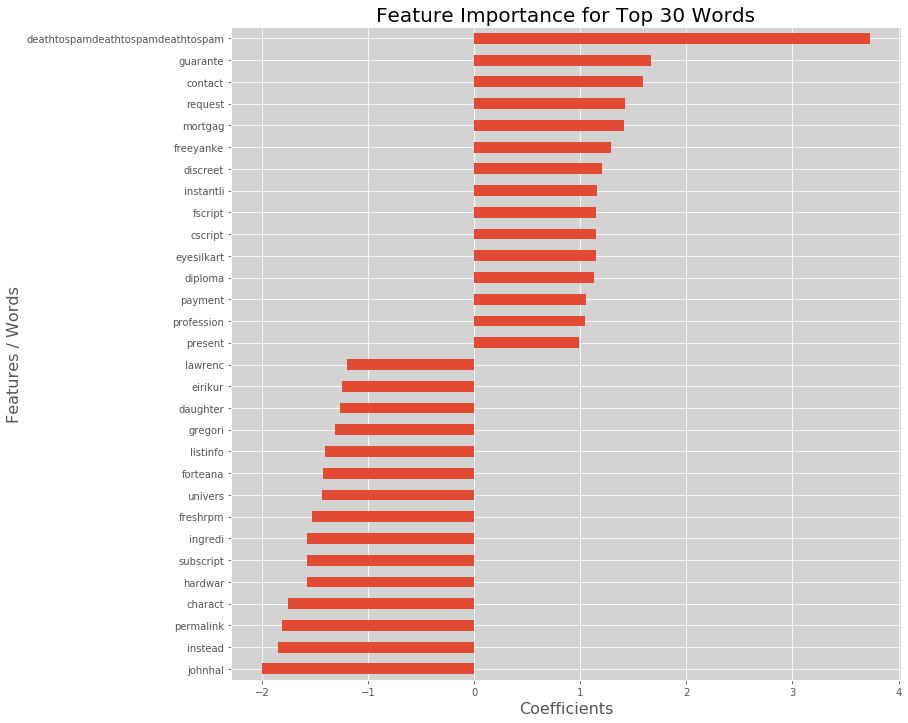

In [398]:
## Feature Importance based on the Logistic Regression model 
coeffs = Logistic_model.coef_.tolist()
column_names=cv.get_feature_names()
feature_weights_top = pd.Series(coeffs[0],index=column_names).sort_values(ascending=True).head(n =15)
feature_weights_bot = pd.Series(coeffs[0],index=column_names).sort_values(ascending=False).head(n = 15)
combined_feature_wts_high = [feature_weights_top , feature_weights_bot]
combined_feature_wts_high = pd.concat(combined_feature_wts_high).sort_values(ascending=True)
plt.style.use('ggplot')
plt.figure(figsize=(12,12))
combined_feature_wts_high.plot(kind='barh').patch.set_facecolor('lightgrey')
plt.ylabel("Features / Words", fontsize=16)
plt.xlabel("Coefficients", fontsize=16)
plt.title('Feature Importance for Top 30 Words', fontsize=20)
plt.show()

### 4   Conclusion

The relatively basic approach of using Naïve Bayes as a classfier produces what appear as impressive results when a large number of features is included in the model. However, the misclassification of an email as spam when it actually is not could have dire consequences. For this reason, an accuracy of 97.5% is likely not an acceptable level of performance for a predictive model for identifying spam unless it is manually skewed toward the tendency to classify as normal non-spam email. This would drastically reduce the number of inadvertently mislabeled normal emails, but would expose the user to more spam emails that they would have to distinguish and recognize on their own.

The main points of interest in this case study were the discovery that the Naïve Bayes model still outperformed a logistic regression model and was able to run relatively quickly. The increase in feature count increased the accuracy of the model but a larger dataset than that used to produce this model could potentially run into much longer run times with high feature counts, so that would be an additional consideration. The amount of adjustment of the email text to generate the model features was also not incredibly high in this case study and there are many possible approaches to attempt, so there is still potential for tweaking the way the text is parsed before passing into a model. The important features shown in the logistic regression model appear to be likely unique to this dataset as it includes names of individuals and certain terminology heavily used within this particular company (or rejected emails based on words rarely found within company correspondence). This indicates that a model like this would not be universally applicable without training first on emails within a company or group.

### Appendix:   Code

#### Data Import

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os
import email
from html.parser import HTMLParser
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import nltk 

In [301]:
## Using the data from the spam folder
indicator = 'spam'
targets = []
data = []
count = 0
spamList = os.listdir("./spam/")
for i in spamList:
    with open("./spam/"+i, "r") as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f"msg {i} not read")
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    count += 1   
    if mailType == "text/plain" and textType == 'iso-8859-1 ':
        data.append(x.get_payload())
        targets.append(indicator)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")      
        data.append(tmp)
        targets.append(indicator)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
        print(textType)


msg 00006.5ab5620d3d7c6c0db76234556a16f6c1 not parsed
text/plain
us-ascii
msg 00009.027bf6e0b0c4ab34db3ce0ea4bf2edab not parsed
text/plain
us-ascii
msg 00011.61816b9ad167657773a427d890d0468e not parsed
text/plain
windows-1252
msg 00016.67fb281761ca1051a22ec3f21917e7c0 not parsed
text/plain
None
msg 00018.5b2765c42b7648d41c93b9b27140b23a not parsed
text/plain
us-ascii
msg 00019.bbc97ad616ffd06e93ce0f821ca8c381 not parsed
text/plain
None
msg 00022.8203cdf03888f656dc0381701148f73d not parsed
multipart/mixed
None
msg 00023.b6d27c684f5fc803cfa1060adb2d0805 not parsed
multipart/mixed
None
msg 00024.6b5437b14d403176c3f046c871b5b52f not parsed
multipart/alternative
None
msg 00026.da18dbed27ae933172f7a70f860c6ad0 not parsed
text/plain
us-ascii
msg 00034.8e582263070076dfe6000411d9b13ce6 not parsed
text/plain
us-ascii
msg 00038.8d93819b95ff90bf2e2b141c2909bfc9 not parsed
multipart/alternative
None
msg 00039.889d785885f092c269741b11f2124dce not parsed
multipart/mixed
None
msg 00040.949a3d300eadb91

msg 00273.0c7d73771d79e84e2aab8c909c5bb210 not parsed
multipart/alternative
None
msg 00275.4675c4cce2bf27adaafeef693d562f8b not parsed
multipart/mixed
None
msg 00277.64128ce1653bc4e1bde9ffe2f83db557 not parsed
text/plain
us-ascii
msg 00278.b62c5fc23a2f87760696cb9fa51f073c not parsed
text/plain
us-ascii
msg 00279.1d58a13e343c1e53aca2ed2121a3f815 not parsed
text/plain
us-ascii
msg 00283.e8e42ee52f919afd2a453983f1256b1d not parsed
multipart/alternative
None
msg 00287.b0495a4dbdff36654c3b3ee2f92bdbf3 not parsed
multipart/alternative
None
msg 00289.61a681a72c71512f115ad65033acc7c9 not parsed
text/plain
us-ascii
msg 00291.7aa227e74e89bdd529a3875459d0d5a2 not parsed
multipart/alternative
None
msg 00293.f4e9fd5549f9063ad5559c094edf08f2 not parsed
multipart/related
None
msg 00298.90b548a0816ca0783f012bb9c69166cc not parsed
multipart/alternative
None
msg 00299.f786faed64bef7134e52fafa17ea861f not parsed
multipart/mixed
None
msg 00303.22239f1393297a691eb5df3dfe7a5001 not parsed
multipart/mixed
No

msg 0178.bf2ab7492e5080b07d7397b0662821a7 not parsed
text/plain
None
msg 0179.3a4c735c7c1e494f4e7a7b9465043280 not parsed
text/plain
None
msg 0182.0fe8b40b189a7bc1ec68b3df5125c602 not parsed
text/plain
windows-1252
msg 0187.e2178f6d01a70dfbdf9c84c4dcaf58dc not parsed
text/plain
None
msg 0189.3d89383221aa3fb155a099838ce9c40a not parsed
multipart/mixed
None
msg 0195.8b276e08dd05b0131faa8fb24764f205 not parsed
multipart/alternative
None
msg 0196.16da0dc3452b7407d4f89a0b2efcff0c not parsed
multipart/mixed
None
msg 0200.a56926c058fa84b0ea031b5774e5dcfa not parsed
multipart/alternative
None
msg 0201.9da0b5702a864a8ffd06cfb4c724f9c8 not parsed
multipart/alternative
None
msg 0202.f1c9a17fe805c50677c104743e4f8be2 not parsed
text/plain
None
msg 0203.beb1b157fc74672074061434cc7bad3c not parsed
multipart/mixed
None
msg 0207.3adcb1a14977a49cac8f6e10f64ac6f7 not parsed
multipart/mixed
None
msg 0212.9a9f009a6d601e2e34c1b95353983352 not parsed
multipart/alternative
None
msg 0215.57c4f4d8e2f582088f8aca

msg 0432.a2fa136962969f603b363e7509668b49 not parsed
multipart/alternative
None
msg 0442.03f023d080136fd537ff369de5dcae10 not parsed
text/plain
None
msg 0443.c5581d58a801553fee57b2bfe904ea93 not parsed
text/plain
iso-8859-15
msg 0445.2cd5092859b75fdccf3724ab2a4ccafe not parsed
text/plain
None
msg 0446.d971f234fa00ed94e18f5ce8f5c0f852 not parsed
multipart/alternative
None
msg 0447.badf14ca8ec589b0b2d25369573ffe84 not parsed
multipart/alternative
None
msg 0449.066d44ef3e1ff26103ea1b35b0a2e6d5 not parsed
text/plain
windows-1252
msg 0450.a828f09ee44e716e6931866e4743e32a not parsed
text/plain
None
msg 0451.588b22df28f4036ff3895447afbcb7f3 not parsed
multipart/mixed
None
msg 0453.622475ac240e9e2cdcdbb1a095cc8d28 not parsed
text/plain
us-ascii
msg 0455.b7a7254a180821d6077a42f7153e12e5 not parsed
text/plain
us-ascii
msg 0458.8c9d2363547ebaf997282910cf21e95c not parsed
text/plain
iso-8859-2
msg 0465.5d27c24cf1797e87a346c02f9bc42587 not parsed
multipart/alternative
None
msg 0474.81ea7ec9e00168ef

In [302]:
## Using the data from the spam_2 folder
indicator = 'spam'
spamList = os.listdir("./spam_2/")
for i in spamList:
    with open("./spam_2/"+i, "r") as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f"msg {i} not read")
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    count += 1   
    if mailType == "text/plain" and textType == 'iso-8859-1':
        data.append(x.get_payload())
        targets.append(indicator)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")      
        data.append(tmp)
        targets.append(indicator)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
        print(textType)


msg 00001.317e78fa8ee2f54cd4890fdc09ba8176 not parsed
text/plain
us-ascii
msg 00008.ccf927a6aec028f5472ca7b9db9eee20 not parsed
text/plain
None
msg 00009.1e1a8cb4b57532ab38aa23287523659d not parsed
multipart/mixed
None
msg 00011.bd8c904d9f7b161a813d222230214d50 not parsed
text/plain
None
msg 00012.cb9c9f2a25196f5b16512338625a85b4 not parsed
text/plain
None
msg 00013.372ec9dc663418ca71f7d880a76f117a not parsed
text/plain
None
msg 00014.13574737e55e51fe6737a475b88b5052 not parsed
text/plain
windows-1252
msg 00015.206d5a5d1d34272ae32fc286788fdf55 not parsed
text/plain
None
msg 00016.4fb07c8dff1a5a2b4889dc5024c55023 not parsed
text/plain
None
msg 00017.6430f3b8dedf51ba3c3fcb9304e722e7 not parsed
text/plain
None
msg 00018.336cb9e7b0358594cf002e7bf669eaf5 not parsed
text/plain
windows-1252
msg 00019.86ce6f6c2e9f4ae0415860fecdf055db not parsed
text/plain
None
msg 00020.7d36d16fd2be07c4f6a5616590cdea07 not parsed
text/plain
None
msg 00021.07d9ab534bbfba9020145659008a3a14 not parsed
text/plain


msg 00183.47b495fc7ebd7807affa6425de6419b3 not parsed
text/plain
None
msg 00184.b4c342594f571eeb609a47b313ac35fe not parsed
text/plain
None
msg 00185.3bc6159431883bb008a8cf973facadb3 not parsed
text/plain
None
msg 00186.614733215984b78299813313394a4ed3 not parsed
text/plain
None
msg 00187.3fb9a7078bff0530ea52484a32c5d7e0 not parsed
text/plain
None
msg 00188.b12197b37ceb97fa0cd802566c1e08db not parsed
text/plain
None
msg 00189.074fe7fad584aa9243fadc6d16f8c186 not parsed
text/plain
None
msg 00190.ee2ea200e7efa602221c6492f9d9d8c0 not parsed
text/plain
None
msg 00191.514dbda1bd10302e5c1d269837df0c66 not parsed
text/plain
None
msg 00192.f2c49e0edfc9d9c861da1e6368cb7d12 not parsed
text/plain
us-ascii
msg 00196.2e07e36c1285ba9187f8168c77d813f7 not parsed
text/plain
None
msg 00197.d77321043295f3683060dcb2bdb8b822 not parsed
text/plain
None
msg 00198.150ad975a44e356b479b88d8b57edc40 not parsed
text/plain
None
msg 00199.3536ffa9d7e1b912f6fc649d779cfe5d not parsed
text/plain
us-ascii
msg 00200.2f

msg 00430.d3915a3e7a9cbd8f9a7e6221eb40253d not parsed
multipart/mixed
None
msg 00431.c6a126091c0bcbc44e58e238ca4d02c6 not parsed
text/plain
None
msg 00436.9fc1d953c6a282c5b66e4ed1cf1b866f not parsed
multipart/alternative
None
msg 00439.eacffbae5543e6be58178c0d3eb95041 not parsed
text/plain
windows-1252
msg 00440.cefb7176fea7baf69c5e9d8b2f1a2b54 not parsed
multipart/mixed
None
msg 00441.3b9c3055e08bda4c0f7eea43749e324c not parsed
multipart/mixed
None
msg 00443.70c948096c848777e165daacad17ce78 not parsed
text/plain
windows-1252
msg 00446.dbbe3d81a19420ba8c135ac7f044319c not parsed
multipart/mixed
None
msg 00447.32e588c3a1d8888d737f360f825713b8 not parsed
multipart/alternative
None
msg 00448.65d06c45ea553e3fddf51645ae6b07f0 not parsed
text/plain
None
msg 00453.7ff1db57e1e39cb658661ef45b83a715 not parsed
text/plain
windows-1252
msg 00455.8ccdcb205b6f8c3958bb3b2d39edca46 not parsed
text/plain
None
msg 00456.c680a0c7d8d8d91bf3fb9f77ce6541b0 not parsed
text/plain
us-ascii
msg 00457.f4325a4aa3

msg 00757.c2da75286819a139e27438ca5c5ba762 not parsed
text/plain
windows-1252
msg 00760.254b8986f3d7b6cbda1cc7ce16860e6c not parsed
text/plain
default
msg 00771.e33fd0de6b6c763a697a4fba307091d0 not parsed
text/plain
None
msg 00773.1ef75674804a6206f957afddcb5ed0c1 not parsed
multipart/related
None
msg 00774.bb00990ae11efeabd677cc2935f2281f not parsed
multipart/alternative
None
msg 00777.284d3dc66b4f1bdedb5a5eba41d18d14 not parsed
multipart/related
None
msg 00784.daac746f35f3bc27817777fa48673781 not parsed
multipart/alternative
None
msg 00785.262ba178488e58bbea695befb45b05e2 not parsed
text/plain
windows-1252
msg 00787.6ac0d6fe5aa9e89ee18e98ed8a556895 not parsed
text/plain
None
msg 00790.365798c56fbfc98b2c8e4cbce0417999 not parsed
text/plain
us-ascii
msg 00791.68d57323ce71a6f706248a709363e9a8 not parsed
text/plain
windows-1252
msg 00794.5e45ec5eb133c2c960f54bf7e4822f77 not parsed
text/plain
windows-1252
msg 00795.61fe820f7755e4b4e66e715ea667b338 not parsed
text/plain
windows-1252
msg 008

msg 01076.7f524e1d3f1523e22d754ce5d4a27ae6 not parsed
text/plain
windows-1252
msg 01077.526ad4ce12f3ef73a4b4eae0f211e2c9 not parsed
multipart/alternative
None
msg 01080.d8ed30c7817d6b4b3b6ce947f31cc8d4 not parsed
text/plain
windows-1252
msg 01082.9f69cd26a420837850841e71d6147a57 not parsed
text/plain
windows-1252
msg 01084.c0005822ea0294c6eb9143276b93eb41 not parsed
multipart/alternative
None
msg 01085.0deb0d9335e8db6cbf1021ae3c62198c not parsed
multipart/alternative
None
msg 01086.158c29f51d36d79ababf4377b5b3f1d2 not parsed
multipart/alternative
None
msg 01094.91779ec04e5e6b27e84297c28fc7369f not parsed
multipart/alternative
None
msg 01095.520dcad6e0ebb4d30222292f51ee76ab not parsed
multipart/alternative
None
msg 01096.ccf870cba7e6618b610f8a2f2c2f08f6 not parsed
multipart/mixed
None
msg 01097.98d732b93866d13b0c13589ae2acc383 not parsed
multipart/mixed
None
msg 01103.1ad34526adee0adab5a8cda98d3f2182 not parsed
text/plain
us-ascii
msg 01108.0a4bf099b98c488b65e8d6ca685d6867 not parsed
mu

msg 01342.7f89acf56fb4398340a0b07481e3193f not parsed
text/plain
iso-8859-2
msg 01344.43dbbbac0d006790dd696123d455f5b9 not parsed
text/plain
None
msg 01345.436954c32bbf82773e33853ac26ef881 not parsed
multipart/alternative
None
msg 01349.71c7c224e68df0a19c1834065368c89f not parsed
text/plain
windows-1252
msg 01351.e960056da1502c90d40d598cdf37f359 not parsed
multipart/mixed
None
msg 01352.875dff8a1fd32766be05e136950add70 not parsed
text/plain
None
msg 01355.a47c042a6e16456c5b49c18d5b3868cb not parsed
text/plain
windows-1252
msg 01356.8d996c0bc08a47a90611de2e8a829048 not parsed
text/plain
None
msg 01359.deafa1d42658c6624c6809a446b7f369 not parsed
multipart/mixed
None
msg 01361.1b094e93a9a83d77859dcbf6637455d1 not parsed
text/plain
None
msg 01363.85518bca7c7cb9f35e57f3adda762ac9 not parsed
multipart/alternative
None
msg 01374.b902d53d7f737be700d6de60a42122d9 not parsed
text/plain
iso-8859-3
msg 01376.73e738e4cd8121ce3dfb42d190b193c9 not read
msg 01377.17adb34fc692245ce301d3db0a3e80c8 not p

In [303]:
## Using the data from the easy_ham folder
indicator = 'ham'

spamList = os.listdir("./easy_ham/")
for i in spamList:
    with open("./easy_ham/"+i, "r") as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f"msg {i} not read")
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    count += 1   
    if mailType == "text/plain" and textType == 'iso-8859-1':
        data.append(x.get_payload())
        targets.append(indicator)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")      
        data.append(tmp)
        targets.append(indicator)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
        print(textType)



msg 00001.7c53336b37003a9286aba55d2945844c not parsed
text/plain
us-ascii
msg 00002.9c4069e25e1ef370c078db7ee85ff9ac not parsed
text/plain
us-ascii
msg 00003.860e3c3cee1b42ead714c5c874fe25f7 not parsed
text/plain
us-ascii
msg 00004.864220c5b6930b209cc287c361c99af1 not parsed
text/plain
us-ascii
msg 00005.bf27cdeaf0b8c4647ecd61b1d09da613 not parsed
text/plain
us-ascii
msg 00006.253ea2f9a9cc36fa0b1129b04b806608 not parsed
text/plain
us-ascii
msg 00008.5891548d921601906337dcf1ed8543cb not parsed
text/plain
us-ascii
msg 0001.ea7e79d3153e7469e7a9c3e0af6a357e not parsed
text/plain
us-ascii
msg 00011.fbcde1b4833bdbaaf0ced723edd6e355 not parsed
text/plain
us-ascii
msg 00012.48a387bc38d1316a6f6b49e8c2e43a03 not parsed
text/plain
us-ascii
msg 00013.81c34741dbed59c6dde50777e27e7ea3 not parsed
text/plain
us-ascii
msg 00014.cb20e10b2bfcb8210a1c310798532a57 not parsed
multipart/signed
None
msg 00015.4d7026347ba7478c9db04c70913e68fd not parsed
text/plain
us-ascii
msg 00016.ef397cef16f8041242e3b6560e1

msg 00128.0e92ec0c8bd8233f7e7873e93df43277 not parsed
text/plain
us-ascii
msg 00129.ac1318f7fba969847e1ac4aa4ec3c26a not parsed
text/plain
None
msg 0013.ff597adee000d073ae72200b0af00cd1 not parsed
text/plain
us-ascii
msg 00130.77c75ddeffde2b89edaf8720370f6afc not parsed
text/plain
None
msg 00131.0884e29887b7378ca04f4defe0a069e0 not parsed
text/plain
us-ascii
msg 00132.2eddfbbe44385a450eae4ee89da0a830 not parsed
text/plain
us-ascii
msg 00133.e5aa9fa1cc35faff5801a6b16ca7afa6 not parsed
text/plain
us-ascii
msg 00134.f7d26b0dc6c2f3de63b08d2810d54df6 not parsed
text/plain
us-ascii
msg 00135.bd3bc1c036eab89c9c50cff40958c939 not parsed
text/plain
us-ascii
msg 00136.c507301e643ec123aa6e487ce2e2e3e2 not parsed
text/plain
us-ascii
msg 00137.11311a8e5dbfe18503bf736b82b91fc7 not parsed
text/plain
None
msg 00138.b4fe49f8cd3b3bcc8d19741e705b0e01 not parsed
text/plain
None
msg 00139.cfea5d726c0371fa63c9720a291ca9ad not parsed
text/plain
None
msg 0014.532e0a17d0674ba7a9baa7b0afe5fb52 not parsed
text/p

msg 00270.d0a83be3891cf0ea26d2af0102e9a875 not parsed
text/plain
us-ascii
msg 00272.c319ce83bd9b379fda60a7991da1b9d5 not parsed
text/plain
us-ascii
msg 00273.b57629503558401c3945450dc5dfc5eb not parsed
text/plain
us-ascii
msg 00274.ecbd86ce57edcb6a419a92479216e43c not parsed
text/plain
us-ascii
msg 00275.4602fde18bf961c7bdff1a65e4e0fcbe not parsed
text/plain
us-ascii
msg 00276.5068c9f11be01b50bd179e900cee257e not parsed
text/plain
us-ascii
msg 00277.0b91824bfb092e74957ecff204754944 not parsed
text/plain
us-ascii
msg 00278.143effa95043688280ced372741d3862 not parsed
text/plain
us-ascii
msg 00279.db581b9c25766016fa42b54f426e1838 not parsed
text/plain
us-ascii
msg 0028.54cf7aa229456fb33194b3a12a713e3e not parsed
text/plain
us-ascii
msg 00280.c853f6dc1379a418f0a48e7ec7009744 not parsed
text/plain
us-ascii
msg 00281.a143a6b20ae0f54335a78d477b3d82fe not parsed
text/plain
None
msg 00282.865809c7b627e9c6f0d5b32b5a80b02c not parsed
text/plain
us-ascii
msg 00283.3049b55cf228fd4add06e7b701f71878 

msg 00417.7ec0b5a250ddfd52a9b46385688f9f9c not parsed
text/plain
us-ascii
msg 00418.93eb266673b3731d82ce305ce6f9aef4 not parsed
text/plain
us-ascii
msg 00419.a88b7702054f8fe1ea38daf082124a6f not parsed
text/plain
us-ascii
msg 0042.7ef6c72f88de15d72b1c0d9c164ccb78 not parsed
text/plain
us-ascii
msg 00420.04f6a1501e06ccfc93978982ee7ece8a not parsed
text/plain
us-ascii
msg 00421.805fdd426ce515374b9e0b42a83a4042 not parsed
text/plain
us-ascii
msg 00422.ac4b66f9c3390c3a98d9c8cbe75f403a not parsed
text/plain
us-ascii
msg 00424.9975dd35a0bc8834d9ccd7dfb27ae7e6 not parsed
text/plain
us-ascii
msg 00425.0ba16e840d94d629f8a3881b4e03a3ad not parsed
text/plain
us-ascii
msg 00426.dbc70af5d406b97fdf70de03697f5a5a not parsed
text/plain
us-ascii
msg 00427.49db73be9017efca7355ee80f173a26c not parsed
text/plain
us-ascii
msg 00429.5c83e9a65ee27155654607ee770b8142 not parsed
text/plain
us-ascii
msg 0043.2ea45c42b1ea15bc214723e142b81127 not parsed
text/plain
us-ascii
msg 00430.3fc5dbd2463ea79d094b859e9d7e34

msg 00568.e5478bfa670cbd9bc3d26ed23e7b3eb6 not parsed
text/plain
us-ascii
msg 00569.d6da87140fd0ef187bcf217a57153cca not parsed
text/plain
us-ascii
msg 0057.be5e34dcebd922928045634015e3ed78 not parsed
text/plain
us-ascii
msg 00570.d98ca90ac201b5d881f2397c95838eb2 not parsed
text/plain
windows-1252
msg 00571.8f35c46bee6d7a238eabf207a5696b0c not parsed
text/plain
None
msg 00572.c406ac5bc5c42bedbce48f5661d29976 not parsed
text/plain
windows-1252
msg 00573.f36b8bb4af93f6b0736e7475eb6cbcba not parsed
text/plain
None
msg 00574.6c736036ab8317e753dae53ef19123e9 not parsed
text/plain
us-ascii
msg 00575.c4b32c1dc29245ce6298f5abf2f0b085 not parsed
text/plain
us-ascii
msg 00576.36892439c0a6bdd5b4231b639b639399 not parsed
text/plain
us-ascii
msg 00578.8c710aa944374d631b9969a806e32a30 not parsed
multipart/alternative
None
msg 00579.566d8e05220571bff1c2f392a1c7bf41 not parsed
text/plain
None
msg 0058.a7c28223050c35c3a22ac4e2b5969111 not parsed
text/plain
us-ascii
msg 00580.41f4f9793351fe7c7d3abe77ced

msg 00714.16c4d34ab2c9622fe82de9570946f9ef not parsed
text/plain
None
msg 00715.ca0843463580080429cb2d0192b9ce0a not parsed
text/plain
us-ascii
msg 00716.c0e0c922db8f605b6475839d8fec9985 not parsed
text/plain
us-ascii
msg 00717.041b5d95813b24c07616f52509bb9fd9 not parsed
text/plain
us-ascii
msg 00718.1fc4cf16dbe6d0395c754671b24782e1 not parsed
text/plain
us-ascii
msg 0072.d1c080832388ae81835ca069e2efffa3 not parsed
text/plain
us-ascii
msg 00720.60fb431980df487172ca5ba412bbedc4 not parsed
text/plain
us-ascii
msg 00721.9f0c973b343b808cdf4ab26c9e9b3b50 not parsed
text/plain
None
msg 00722.6520838870f11a569a006ac7e119782f not parsed
text/plain
us-ascii
msg 00724.06d186a9890c1bc07b1e0bd89b7efb8f not parsed
text/plain
us-ascii
msg 00725.5d2dec63252bb5fc57f3de280129656a not parsed
text/plain
None
msg 00726.96933510684f33c2eea5711f969fe444 not parsed
text/plain
us-ascii
msg 00727.ea5bab335cc61c1d3d85a8566232f5e8 not parsed
text/plain
us-ascii
msg 0073.cd29b8202a4b05db3c6f0d71b72a3260 not parse

msg 00855.8e0647984e6592b6400021a5b87ee133 not parsed
text/plain
us-ascii
msg 00857.cea46b6fc4077476d49923b4d56621e7 not parsed
text/plain
us-ascii
msg 00858.54a727ce6b2e452f05e2719d99393999 not parsed
text/plain
us-ascii
msg 0086.b96641b3e0a2cf8c238976336d45a86c not parsed
text/plain
us-ascii
msg 00861.6e526bc95d6eb4736211696fec13d9f0 not parsed
text/plain
us-ascii
msg 00862.b3e793b7c8e41cd45a0eccaa7abaf722 not parsed
text/plain
us-ascii
msg 00863.f20cfe969a2e3162ce6ce19fd80188bd not parsed
text/plain
us-ascii
msg 00864.95da38aac2ee9c6c8d36d0f2f1e8c8e5 not parsed
text/plain
us-ascii
msg 00865.ffa802dadbaca77b74f05cc1c23c30bd not parsed
text/plain
us-ascii
msg 00866.670508b848fa453d194f443f4737b351 not parsed
text/plain
None
msg 00867.9e8b300d814c941ba6bbedba138239f0 not parsed
text/plain
us-ascii
msg 00868.f6059340a945c22b175f306ee79e674e not parsed
text/plain
us-ascii
msg 0087.dd5f3aa35f50008bf7dfc5059ac8a239 not parsed
text/plain
us-ascii
msg 00870.cf6be25af593cc88d0c7f58e7deccea4 n

msg 00983.42eb62cc4057d03dfd3eb1c8afc270e2 not parsed
text/plain
us-ascii
msg 00984.6f4ec805e2e78d5310e0a4ae931e67b3 not parsed
text/plain
us-ascii
msg 00985.e20b9f4f171d907fb8d8439584fe03b1 not parsed
text/plain
us-ascii
msg 00986.93b7eb74f26330872be1d58ec9d2b64c not parsed
multipart/mixed
None
msg 00987.88641ac821f19f26060f12197bc585a4 not parsed
text/plain
None
msg 00988.2154210bb53f94daded7a622e26225a1 not parsed
multipart/signed
None
msg 00989.59155225507b38fbee48407ebb6cc68d not parsed
text/plain
None
msg 0099.9f54be08406e67fd8944f2f1d0fbdd90 not parsed
text/plain
None
msg 00990.ee34876c3873d8e6197432ad9c558429 not parsed
text/plain
None
msg 00991.ec5d16cf8c633a2f15b8f98a39c58a60 not parsed
text/plain
us-ascii
msg 00992.4a6d6d9013a804213fff718806aaae49 not parsed
text/plain
None
msg 00993.041d0d8e108657fd1ba5c605a10e2bfa not parsed
multipart/mixed
None
msg 00994.63ad3cd73487972bfc2eb3e78e2e7cf9 not parsed
text/plain
us-ascii
msg 00995.11200ae0fc914c7056dcbf7dcfb4c107 not parsed
t

msg 01140.71d7100b58f00faaf258b49150c6f54a not parsed
text/plain
None
msg 01141.4dcaffc342880fbdbace580e702a1385 not parsed
text/plain
None
msg 01142.c86c585292af26a7c1b09ed6345982a4 not parsed
text/plain
None
msg 01143.77077715a838bb473dad6a466d2e2403 not parsed
text/plain
us-ascii
msg 01144.b3cbc4db9d2eac4cd0bea04fd75fc859 not parsed
text/plain
None
msg 01145.4280ea0a58b56c22eb21583a3b3db290 not parsed
text/plain
us-ascii
msg 01146.fe05a7a131928bf0997793278e203448 not parsed
text/plain
us-ascii
msg 01147.ee1b78a672dbd806bf3393ee9c3903c8 not parsed
text/plain
None
msg 01148.a8dd7b8896c5c7966bbc52e4f4b0a164 not parsed
multipart/signed
None
msg 01149.a3ac28c8860e0beffc8ace0ff49b4532 not parsed
multipart/signed
None
msg 0115.41825f367f7f1efcc31e12376d82a994 not parsed
text/plain
us-ascii
msg 01150.8cf9e9429b48ec70e4912a0acacf6a99 not parsed
text/plain
us-ascii
msg 01151.a454cc33dce527bedd70cf42cff5f079 not parsed
text/plain
us-ascii
msg 01152.94d97f41bdf572892508e21b3906aa3b not parsed
m

msg 01308.18d641ec475649b1a8ea5ba7292b3e05 not parsed
text/plain
None
msg 01309.2bec637bc28145370e47c323f994e6eb not parsed
text/plain
us-ascii
msg 0131.b715566061ab90d0f8745ce0ac010832 not parsed
text/plain
us-ascii
msg 01310.770eccd33b2cdef430359fe8a771e2de not parsed
text/plain
us-ascii
msg 01311.bcbaf39917e22619944a0e18eb7233f7 not parsed
text/plain
None
msg 01312.f553517c829fc5778f61f879aa6330df not parsed
text/plain
us-ascii
msg 01313.f8778c3339382c5514c9e201847f75ee not parsed
text/plain
us-ascii
msg 01314.ba7b992d372c23964b8b4a1de885a095 not parsed
multipart/signed
None
msg 01315.8e0a668ce9b6e62261baccba167f8a67 not parsed
text/plain
None
msg 01316.41c15382cdd5ff4fe78ae3484ff1dc6d not parsed
text/plain
us-ascii
msg 01317.55468871d6f7618afed9a0b07ee2609e not parsed
text/plain
us-ascii
msg 01318.db11c5ecba49aba4fb12fbead712f815 not parsed
text/plain
us-ascii
msg 01319.683e3c750cb5757c27ee18cf6a2ff905 not parsed
text/plain
us-ascii
msg 0132.bcd23223120c0be6b991ae0349cd127c not par

msg 01441.28d32ca53515c4d059474dcf544cfa20 not parsed
text/plain
None
msg 01442.a81b9c1ad6e37314caa3068a26ca203e not parsed
text/plain
None
msg 01443.fbf45616f74c213bc92c655133eeee73 not parsed
text/plain
us-ascii
msg 01446.2bc1d074ad6e9bc83adf861ccbf0c498 not parsed
multipart/signed
None
msg 01447.98e4b20ceb192594e992f7db9f8dfc53 not parsed
text/plain
us-ascii
msg 01448.335343826f0aef0c176f3aebe3c1806a not parsed
multipart/signed
None
msg 01449.36c83d8ef96bc2bf4f6606ab8e62a4a5 not parsed
text/plain
None
msg 0145.7400cf6ab4cfe5ffeaab582c9730c656 not parsed
text/plain
us-ascii
msg 01450.b1d4f6eb3023d388319422cec20d1b0d not parsed
text/plain
iso-8859-15
msg 01451.b5a50ca35f50e38d37a2eba47399f57d not parsed
text/plain
iso-8859-15
msg 01452.05464b6ef101be1f2f10809d1577d630 not parsed
text/plain
iso-8859-15
msg 01454.9d6b2206cc67fc7bdce65109a7bf1b5f not parsed
text/plain
None
msg 01455.6f59785ae19e2d0c92f0f18764e5e8a6 not parsed
text/plain
us-ascii
msg 01456.5f475d17a5f72ce4067c8727d2db160a

msg 01574.5c7050ec28a486ed83aac7d6ee562038 not parsed
text/plain
us-ascii
msg 01575.9eec6737661d3d57e8b3ca91200d7ef7 not parsed
text/plain
us-ascii
msg 01576.6b733eba3bd6a287e0ef2a99b9afbd68 not parsed
text/plain
us-ascii
msg 01577.481ae48bcd887cf4af60219de12f42a1 not parsed
text/plain
us-ascii
msg 01578.c6f29a4932ca0d892e409d8233619022 not parsed
text/plain
us-ascii
msg 01579.434bedd57f027223f76db3d11f4d960e not parsed
text/plain
us-ascii
msg 0158.05f321b3cb42b6b62bc8a250a7bad59f not parsed
text/plain
us-ascii
msg 01580.18d5a4c41d28019ab90c111133a07d6a not parsed
text/plain
us-ascii
msg 01581.83fd47e65808dbeddb6340cfcf40b44f not parsed
text/plain
us-ascii
msg 01582.251d2e9ec5028a548d6ddfa3dffe86c2 not parsed
text/plain
windows-1252
msg 01583.588f335629805c17aaa6b880c2f586c7 not parsed
text/plain
iso-8859-15
msg 01584.c2bc0fb5826431ed3df58a0fc968c068 not parsed
text/plain
us-ascii
msg 01585.b819696d5221a8f929902b77a2fc966b not parsed
text/plain
us-ascii
msg 01587.574845236697b5ca4b2133

msg 01738.780eecf7f0db1db00bd0a6248de51260 not parsed
text/plain
None
msg 01739.f57fcc3356b4c910af8ac2ce06d7301c not parsed
text/plain
None
msg 0174.a916896b6119d1b8a138dfbbeeee7fa1 not parsed
text/plain
None
msg 01740.22ff82ab4b9265075924f41abe0460f7 not parsed
text/plain
None
msg 01741.2a15d667c53727befded94d9b526afff not parsed
text/plain
None
msg 01742.e5c02ab6101d2a7759f059da0e6385ca not parsed
text/plain
None
msg 01743.07f7f47e25de2b8f08cabfc5ef3e3709 not parsed
text/plain
None
msg 01744.add31f8a35fa0fd63e70eacd58c82a44 not parsed
text/plain
None
msg 01745.46a467858b1369e9513a8a369a67a70b not parsed
text/plain
None
msg 01746.06fb7b96d18dae121abb94e8a7624f4b not parsed
text/plain
None
msg 01747.147241797a056a32e99562b240ebb283 not parsed
text/plain
None
msg 01748.69dcabe5a5fe6ffc5e20522e4c5477e4 not parsed
text/plain
None
msg 01749.da79f6e9c4f07174e5dec173c9481b99 not parsed
text/plain
None
msg 0175.dd1831e0f3322282d3efa5da7aec74f9 not parsed
text/plain
None
msg 01750.73b4d9ab83de

msg 01899.c95b24588b4ed006af5332e498a23723 not parsed
text/plain
None
msg 0190.41da72c46bce52a15056a0171b56a917 not parsed
text/plain
us-ascii
msg 01900.1b90f4154957d1860a3de19ba95ede12 not parsed
text/plain
None
msg 01901.b9c2a64e9531ae9f0f6aedbb42b7c1fb not parsed
text/plain
None
msg 01902.7911c2c7f6b6f3ca8ecf8fc35df8aa28 not parsed
text/plain
None
msg 01903.7cd58b43139e430224c5de7639b0d5d7 not parsed
text/plain
None
msg 01904.c85458b60f9ef9b77f1f9530a7d3729e not parsed
text/plain
None
msg 01905.5ef2d9dfa4dc1df5e1c2cc2f7f694092 not parsed
text/plain
None
msg 01906.9445c6890c7a515634bfd7f52116cb45 not parsed
text/plain
None
msg 01907.e3d6292e517c3efb5e11773790b9be4f not parsed
text/plain
None
msg 01908.d4433993e642ce126d272930d9ce47da not parsed
text/plain
None
msg 01909.46dafb96df4c8a412d5d7b1ba7469109 not parsed
text/plain
None
msg 0191.314e2f68086989044e631e347a03b979 not parsed
text/plain
us-ascii
msg 01910.2eb8fda6fb32ed1a19ac7cc9a4e51f82 not parsed
text/plain
None
msg 01911.4b26

msg 02060.0b202908cd60ea1f719c700ed73f2806 not parsed
text/plain
None
msg 02061.22bbc22474fdf08ca2fb5d8353675730 not parsed
text/plain
None
msg 02062.c7e072e021caef4d69db2422f117acff not parsed
text/plain
None
msg 02063.eb91377a959b437f6977f0db277f30e6 not parsed
text/plain
None
msg 02064.8479a2ccea9f9f503098cd53601ca0c2 not parsed
text/plain
None
msg 02065.4773cf538284baa6a4b0c26e41115e8e not parsed
text/plain
None
msg 02066.90b20b7ff6897463b82a981713cbdef4 not parsed
text/plain
None
msg 02067.4d2f2b0ae64c68570f08423ed43ce845 not parsed
text/plain
None
msg 02068.bbd1abb5ce3c84be97f8423e631a872a not parsed
text/plain
None
msg 02069.6a2d4fb29121bc81427eb1519b5fdf9c not parsed
text/plain
None
msg 02070.5686ae05b8d5e6eb569995e3e4fb2751 not parsed
text/plain
None
msg 02071.eb5bab68ff59c5d8b3261c30e92b5cde not parsed
text/plain
None
msg 02072.d62917c72ae68ea3b426ad9c063e461d not parsed
text/plain
None
msg 02073.1b332bbccca72969c7af61749d0f3b4c not parsed
text/plain
None
msg 02074.c21a64b241

msg 02221.879d8772739a56d751f60d43900609a2 not parsed
text/plain
None
msg 02222.9bef51f7af05a6b348a6b696c687c23f not parsed
text/plain
None
msg 02223.ceda95b7f82b5015e11a6eedcb50378b not parsed
text/plain
None
msg 02224.4f3f70256587197ca97a89d947bb3059 not parsed
text/plain
None
msg 02225.fbb50abca97a353460a3adbfa26b0353 not parsed
text/plain
None
msg 02226.f0d35bc5878e743c176afbe9b51dc8d2 not parsed
text/plain
None
msg 02227.bc3b678dc7d0e59974fd2d2bfccfc21f not parsed
text/plain
None
msg 02228.af711080d4eb57589dbdae3ebb10cd83 not parsed
text/plain
None
msg 02229.22705c47166ea4c8a659bb0b0853c121 not parsed
text/plain
None
msg 0223.a009cff7a913fae0e58d901e5e847a82 not parsed
text/plain
us-ascii
msg 02230.83d29be67d33b60cfc25c55a8a7d2c16 not parsed
text/plain
None
msg 02231.f2e821bac37b113fc3e095f4f597d81d not parsed
text/plain
None
msg 02232.5b851f21174e8a172cdeb2c4fac519fd not parsed
text/plain
None
msg 02233.371bfe54c9b2da2ccdf0011da37af005 not parsed
text/plain
None
msg 02234.532c6df

msg 0238.7b9b9b2e3b3ca24ae8960f03aab57964 not parsed
text/plain
windows-1252
msg 02380.25e823fa7a52cdd64be4b53caf862f34 not parsed
text/plain
None
msg 02381.e00a6c4a6d57003d10e0df8dc65e1b8b not parsed
text/plain
None
msg 02382.eb2484cdedd309cd6d94fdc9731ef5c5 not parsed
text/plain
None
msg 02383.833224f74156975eb4364e6a4ddf9a0a not parsed
text/plain
None
msg 02384.1833d9d553ee4c2bf37bfedb952a1424 not parsed
text/plain
None
msg 02385.f62055b86361f86a511971dfcbe54fd6 not parsed
text/plain
None
msg 02386.50c399343f4145ea32f5c5e6828ce2bb not parsed
text/plain
None
msg 02387.9d5f4f48c229943053ee40235b3fd75c not parsed
text/plain
None
msg 02388.065b9450504ae5c247c966660fd297e1 not parsed
text/plain
None
msg 02389.bf7ec2ae6243dab5dfc26c3f31c25b2a not parsed
text/plain
None
msg 02390.e9c19167c2abb222ddb6ecd1ec91a048 not parsed
text/plain
None
msg 02391.96819f50982c2bbe2b1bcb5ac241d2a9 not parsed
text/plain
None
msg 02392.5cfa16e5b6c7712e109a845b8fed4949 not parsed
text/plain
None
msg 02393.fd8

msg 0284.4af1f0641ea6aae6a9645dcbeabe95e9 not parsed
text/plain
us-ascii
msg 0285.c50f8a5a908e21636fe71e522c3e462a not parsed
text/plain
us-ascii
msg 0286.25aefc468274fe144edb1ee788d6c999 not parsed
text/plain
us-ascii
msg 0288.3ae040d2c993ea997470df41f31aebcb not parsed
text/plain
us-ascii
msg 0289.cb9c0595bddae2c25357ce5c9fbaf687 not parsed
text/plain
windows-1251
msg 0291.b37f92cfbb14d2f6a43c705ef7381702 not parsed
text/plain
us-ascii
msg 0292.6599ff4b0c1593297dd17247919b3fcf not parsed
text/plain
us-ascii
msg 0293.24bc65777fdb12d17b16e3976c1f7c17 not parsed
text/plain
us-ascii
msg 0294.145bbce5c541610ee520838637d2e112 not parsed
text/plain
us-ascii
msg 0295.27b3176967da2ccf237679a15788d821 not parsed
text/plain
us-ascii
msg 0296.42216a75e0256510b216eaba6893d40d not parsed
text/plain
windows-1252
msg 0298.fb2fe4458efbd24753b011bf6db2deab not parsed
text/plain
us-ascii
msg 0299.4634eee63f5808c91c2f30720802a5c5 not parsed
text/plain
us-ascii
msg 0302.fdd70fa4825d589e4646798a785f6902 n

msg 0429.507724a2bf64d0cfb77a9521b6e7c616 not parsed
text/plain
us-ascii
msg 0430.4e314d3f69d885ce2c18d2e64eb72a1b not parsed
text/plain
us-ascii
msg 0433.17677985f6ef28591870fe906db93f8b not parsed
text/plain
us-ascii
msg 0434.0f6c124ba411ccbf48ed5ff2e19c4603 not parsed
text/plain
us-ascii
msg 0435.7d06c898a16be4efbfbdef62c347ab59 not parsed
text/plain
us-ascii
msg 0438.2c8e5278416ba90daef0c4874b5f00bb not parsed
text/plain
us-ascii
msg 0439.44081ab02df438a46002b412aee32fbc not parsed
text/plain
us-ascii
msg 0440.59f6365d96fda96ac8b48059358e18b0 not parsed
text/plain
us-ascii
msg 0441.ceab9dcbd4892de96af3e38b96205f54 not parsed
multipart/signed
None
msg 0442.91893de42b92445e8dc40a3900809439 not parsed
multipart/signed
None
msg 0443.9a9e4c025d607ce0c5d103c02ca3c178 not parsed
multipart/signed
None
msg 0444.58dd409fb0fc0d853c6b9042560c6ae1 not parsed
multipart/signed
None
msg 0445.bca3c6c6a0dc8f7e0c3bd140936897a8 not parsed
text/plain
us-ascii
msg 0446.321425772cd75481e72bd8c30d1bd78c n

msg 0590.163e32d267b894e61f0386e879cde23b not parsed
text/plain
us-ascii
msg 0592.217bf33fe765d8cf064a732d56a51ba3 not parsed
text/plain
us-ascii
msg 0593.3c0b49542cfd173508426513c02483c6 not parsed
text/plain
us-ascii
msg 0595.2e433fbc3ba01f085d54b39e4b695a62 not parsed
text/plain
us-ascii
msg 0596.5826fb71adb141704275e2cb8fdddb4f not parsed
text/plain
us-ascii
msg 0597.658c7632c57e9f07a7bc28b58b97529e not parsed
text/plain
us-ascii
msg 0598.1ac8a662753f1bba429f52eb184ba794 not parsed
text/plain
iso-8859-15
msg 0599.dcd037ac7e916599160fc182080defe3 not parsed
text/plain
us-ascii
msg 0600.5c058c763f0c2053e70d2a6ddd5afd1e not parsed
text/plain
us-ascii
msg 0601.ecc0277d1962fad8005495cd09dea1aa not parsed
text/plain
None
msg 0602.af33589441908011e53b55d4702012cd not parsed
text/plain
us-ascii
msg 0603.4582f2bcf4795cdd8136e04313f0c0fc not parsed
text/plain
us-ascii
msg 0604.5ce333fc713b6c6f85386d8be149c1b4 not parsed
text/plain
None
msg 0605.0b692301193854c686d6c257203c9976 not parsed
tex

msg 0741.4a16993a679f825b18b571c6356fbcb9 not parsed
text/plain
us-ascii
msg 0742.65f3bb623bd6a6e49a9d1e0f9ee66279 not parsed
text/plain
us-ascii
msg 0743.11737315524334fda4487c948caab0a0 not parsed
text/plain
us-ascii
msg 0744.8148cbab42e9b5a4f31f22017b3eccc4 not parsed
text/plain
us-ascii
msg 0745.3e54df3c4f199b6b8aed76eefd11c660 not parsed
text/plain
us-ascii
msg 0746.eb20a810f43c9bd9663c0da5e553ccc4 not parsed
text/plain
us-ascii
msg 0747.0ae2c1995e3f8c30bd2f69a5e51196ba not parsed
text/plain
us-ascii
msg 0748.b144313155aeba13b5eda936e120daae not parsed
text/plain
us-ascii
msg 0752.17c76022e66852f8a3cff5745f5937d4 not parsed
text/plain
us-ascii
msg 0753.45965735008c580a773f99eada080a27 not parsed
text/plain
us-ascii
msg 0758.84f1c5bbacc2184d06eb79e4c3a81552 not parsed
text/plain
us-ascii
msg 0759.063f18d8df64aaf029d8d9925828b52c not parsed
text/plain
us-ascii
msg 0760.15302b8ee38651c2da6e4df6a7358c98 not parsed
text/plain
us-ascii
msg 0761.e0096025fc83e5704a05d505cf96cca5 not parse

msg 0897.c0fe033806bfaf60f935e01aec04eec6 not parsed
text/plain
us-ascii
msg 0898.7ae0747c5a557c5362ba43b0fbfef22c not parsed
text/plain
us-ascii
msg 0901.9f7871c3213d421e802debe94f33b09e not parsed
text/plain
us-ascii
msg 0902.056094d922ad63d0d84ad331469a3b37 not parsed
text/plain
us-ascii
msg 0903.8b54a580db644a9a23934361d5173610 not parsed
text/plain
us-ascii
msg 0904.281bae2420e1d4491270fb4ccfe7c4e6 not parsed
text/plain
us-ascii
msg 0906.2e604cc2a15e9f2a68c302861ac42ec5 not parsed
text/plain
us-ascii
msg 0907.f0d5881329abda19ea946cf5c2e15d63 not parsed
text/plain
us-ascii
msg 0909.6e3ac55814e0630adcbe7e91f131e18c not parsed
text/plain
us-ascii
msg 0910.1c60142bded401b4c9921b2c48600619 not parsed
multipart/alternative
None
msg 0911.dcc71630eed7821469e4c26e5b768aee not parsed
text/plain
us-ascii
msg 0912.7951bb152a4106ceff12048a818491a3 not parsed
text/plain
us-ascii
msg 0913.40f91b03e40a8c45819dabbfd5dc8158 not parsed
text/plain
us-ascii
msg 0915.50f33ca8972e7e8be40c70edb7c4be73 no

msg 1030.9a38ec315e2e8926085a560e36f977b8 not parsed
text/plain
us-ascii
msg 1031.cfbae64b0894abd4ef88ddbf253fa704 not parsed
text/plain
us-ascii
msg 1032.725446990feeb941bce8a383943cd2a2 not parsed
multipart/signed
None
msg 1033.4155e06c0fb104b96ec6c5d656264fa7 not parsed
text/plain
us-ascii
msg 1034.30d39e880274b0ebb59462ddfff16880 not parsed
text/plain
us-ascii
msg 1035.a3cdb2fe04945379483b12640bdb19d4 not parsed
text/plain
us-ascii
msg 1036.8c6e8c189738f671c5fd1cb2b1791317 not parsed
text/plain
None
msg 1037.1285e23706448e51cb9be399cd0546ed not parsed
text/plain
us-ascii
msg 1038.4a0af891d4474c608eb6a3ffedeb8ada not parsed
text/plain
us-ascii
msg 1039.28e0f6b0f1e09bbcebc01183bd3557c4 not parsed
text/plain
us-ascii
msg 1040.0975203bad39968cfceadfcd68a9242b not parsed
text/plain
us-ascii
msg 1041.c96194d26968c693aca4f4ef5f4a6a61 not parsed
multipart/signed
None
msg 1042.5089423fc172a53a687d43ad6b432caf not parsed
text/plain
us-ascii
msg 1043.701d8a6b948c0e1406a85fc621497237 not parse

msg 1179.2cebdef3b31479afbfdb2c230046f84b not parsed
text/plain
us-ascii
msg 1180.9d441ee49eef8ba99c54ff8ec4ea9096 not parsed
text/plain
us-ascii
msg 1181.e94c4c98963c99b42be08be341418d57 not parsed
text/plain
us-ascii
msg 1182.3156d66c268869ee74f080a7c7523be8 not parsed
text/plain
us-ascii
msg 1183.54b599ea32d753071ca44e55db7fe85d not parsed
text/plain
us-ascii
msg 1184.152999961bd0606fb0dcb6d6f95cc96d not parsed
text/plain
iso-8859-15
msg 1185.b83ac460b08616796da67d3bc57b76df not parsed
text/plain
us-ascii
msg 1186.fcd93eee19319006fece61d0d3a0bc13 not parsed
text/plain
us-ascii
msg 1187.e5fee75dd86128e81186369567522f61 not parsed
text/plain
us-ascii
msg 1188.1f6d5c1960b4d2d50e9745073559284e not parsed
text/plain
None
msg 1189.e69e458af7eefebc70d658dd2e6d23df not parsed
text/plain
us-ascii
msg 1190.99eaa82bada000ca0ada9512a3f590e2 not parsed
text/plain
us-ascii
msg 1191.f8b145ebabbd42450c292e448cf44f15 not parsed
text/plain
us-ascii
msg 1192.1d7f09a0119d74789f1918f9c02beb45 not parsed

msg 1326.5f4584fd2f3f2d4a4b0989b7d5c7963f not parsed
text/plain
us-ascii
msg 1327.732de5c513bb352139c28a17740f4128 not parsed
text/plain
None
msg 1328.cccf5939c5844ebccd4f7b4bdad42e63 not parsed
text/plain
None
msg 1329.e3ef761ca36621fa1095cb6f942886c9 not parsed
text/plain
us-ascii
msg 1330.2e2ec961c9022cd26a555e4779726a05 not parsed
text/plain
us-ascii
msg 1331.6ad39d03e006435853139ea69757b8f4 not parsed
text/plain
us-ascii
msg 1332.64cca4cfc08e86b88c4974237e7c2a5a not parsed
text/plain
us-ascii
msg 1334.2c9c592fd955e975f86e536b6ac5cadd not parsed
text/plain
us-ascii
msg 1335.57112a05c5a5ba633707ed3fdecfd88c not parsed
text/plain
us-ascii
msg 1337.eb38bf81b8a24991252e451208c24ecd not parsed
text/plain
us-ascii
msg 1338.6656824f5801ca79629b3374e834ad04 not parsed
text/plain
us-ascii
msg 1339.57de97732c190bf4575276eb054e0e79 not parsed
text/plain
None
msg 1341.91bc30d50566e71807217c8977f7a793 not parsed
text/plain
us-ascii
msg 1342.6770473802a7dc7ab14a212f95573c15 not parsed
text/plain

msg 1478.493c4ba8cee0986a8cabb3953a40fb5b not parsed
text/plain
us-ascii
msg 1479.1ef8029a7d0ea41d3032b6174793a35f not parsed
text/plain
us-ascii
msg 1480.ea8e1a4bb0cfd66e9f04c4f3c1c3379e not parsed
text/plain
None
msg 1482.75a9c57c2bd53175e33ee6ed037400fd not parsed
text/plain
us-ascii
msg 1483.0e8f2eee9641c6af54fb45495cb65018 not parsed
text/plain
None
msg 1484.b12cd10a9234dd4c294f93ba7b3944d4 not parsed
text/plain
us-ascii
msg 1485.466b9731651b090d2ecee034e696cda1 not parsed
multipart/signed
None
msg 1486.1ff97d5b7b97423fb1ec74f6a54fc225 not parsed
text/plain
None
msg 1487.0dec4dc8ef9439d54e1605b2a526e2ff not parsed
text/plain
us-ascii
msg 1488.6694aa49b517656806a631deeb8f89a8 not parsed
text/plain
us-ascii
msg 1489.d724933540e63e324268925f6c803361 not parsed
text/plain
us-ascii
msg 1490.e80cf700ef4de2385ada6ae149e7498c not parsed
multipart/signed
None
msg 1491.2e82a3803e51f420c6398d963052469f not parsed
text/plain
us-ascii
msg 1492.fcfeff3d31bfad092220ca731a40c05e not parsed
text/p

msg 1644.ba26918a1837fcadae2327adc12a797d not parsed
text/plain
None
msg 1645.60a80c94ae8fec2ef1f1ef0915445400 not parsed
text/plain
None
msg 1647.e868de6866be80866e13b1660d95537c not parsed
text/plain
us-ascii
msg 1650.3d76995e778ef56fcf4ff76b02d485ed not parsed
text/plain
us-ascii
msg 1652.d6f822887fdfa0d184c6303d28b97acf not parsed
text/plain
us-ascii
msg 1657.41457c98e0009a99d917acfbc8f229cd not parsed
multipart/signed
None
msg 1659.e94135f919552d1bc8bf35f0a84b483c not parsed
text/plain
us-ascii
msg 1660.f4b2e5b394c3aaf2589c49c205ca05d7 not parsed
multipart/mixed
None
msg 1661.ea88a58a5adbb42b5f456544688849ad not parsed
text/plain
us-ascii
msg 1662.70a7a270f3adfa3fafdc01a05c200fef not parsed
text/plain
us-ascii
msg 1663.3cda52dac479d2b668e3410feb916e38 not parsed
text/plain
us-ascii
msg 1664.e67aee25046de6fd0243b8c6fec81c5b not parsed
text/plain
us-ascii
msg 1665.46bc87071ff202b6f0c37c8a4b6a42a4 not parsed
multipart/signed
None
msg 1666.822fe7bdc3780066edfa4847f6399477 not parsed
t

msg 1820.7b6864b6307973a30ec24e69fc4a466a not parsed
text/plain
None
msg 1821.049911b67a0ff546e80e2acc6bcbe6ff not parsed
text/plain
None
msg 1822.a401ddc61fc3d89fbaee70ea107a9956 not parsed
text/plain
None
msg 1823.edac63c7227d89192cc41c922d689d22 not parsed
text/plain
None
msg 1824.33f28d80618a37469e4530603d6f8b5b not parsed
text/plain
None
msg 1825.d77de28865080535c4e108eada26ed24 not parsed
text/plain
None
msg 1826.26284dbbc6f595fdc9c388008e5aa72c not parsed
text/plain
None
msg 1827.9dd46d474cc33df16c9443ac6759e679 not parsed
text/plain
None
msg 1828.80327e3b2580e1e277165899b2532871 not parsed
text/plain
None
msg 1829.1c598ff775a4de81c391eb9bb738d0c9 not parsed
text/plain
None
msg 1830.d6713b65baf275582be556a87a824dd4 not parsed
text/plain
None
msg 1831.0bbb7ccf73587c7f02655596e7fa6477 not parsed
text/plain
None
msg 1832.01f5d745e5bca5dcb35f0f863f4b0bdf not parsed
text/plain
None
msg 1833.3d930e2d4968f325cc6a773df09e8969 not parsed
text/plain
None
msg 1834.48b91fabd8e14b220898d3dae

msg 1993.27048515acdeabc66b9013c97649df28 not parsed
text/plain
None
msg 1994.229d82d8a3ec1e099e6c8904faaaa32a not parsed
text/plain
None
msg 1995.fa031be950098e730d0c0c1cbaf756e7 not parsed
text/plain
None
msg 1996.ac27043b68b6b631fd03b2a107b3854b not parsed
text/plain
None
msg 1997.3153cb4a5f2bc8052891b6d9e8bfceee not parsed
text/plain
None
msg 1998.25f428334e65c83e59f238ef6e90ab85 not parsed
text/plain
None
msg 1999.44b34d72c70aad76e23e7e11169894d7 not parsed
text/plain
None
msg 2000.f5754a180fc6394657dc27921f88aaae not parsed
text/plain
None
msg 2001.741b26ed34a4c4c1a00cd13fab78b174 not parsed
text/plain
None
msg 2002.4aee6e78ce794e84f44ccde11f46fd4c not parsed
text/plain
None
msg 2003.cab84732937d71e57c872ab3c97893ac not parsed
text/plain
None
msg 2004.026ca4acaa07ff5fd9a5512393cded81 not parsed
text/plain
None
msg 2005.f95c773a32ba576c1da3324820a33f74 not parsed
text/plain
None
msg 2006.65d9202fe457e8c8eb1510926632d148 not parsed
text/plain
None
msg 2007.52f6b2592f14ac82581df53aa

msg 2164.1a46ee8b5542d762cb2f364fe48207ae not parsed
text/plain
None
msg 2165.e70044bb021cbe032cec4c24ccf0c78d not parsed
text/plain
None
msg 2166.1b4ee93f256355cb32c60aaddc07e90a not parsed
text/plain
None
msg 2167.9588865b97e81346cee53865b19d559b not parsed
text/plain
None
msg 2168.78d5d7b3c85d3215edefae196a24bb30 not parsed
text/plain
None
msg 2169.8b7b5f65ef9511d96214e3648d3956b0 not parsed
text/plain
None
msg 2170.78c282a5e417d6d231dc75aa8588ebb7 not parsed
text/plain
None
msg 2171.a86d3fc0e0dbc1d4a829381e554fce82 not parsed
text/plain
None
msg 2172.356c6cdae52c866f32e0e62ab082801c not parsed
text/plain
None
msg 2173.23722932b26a06491eec963ae3531df5 not parsed
text/plain
None
msg 2174.ee8fcfba2ef21c8cc97429a9f9c31f2f not parsed
text/plain
None
msg 2175.5e6bad4f0f6bc954e5883edc34a0e22c not parsed
text/plain
None
msg 2176.71c9df46ed8e77885083e1b9bb7f6276 not parsed
text/plain
None
msg 2177.e47377131d2204e0b6830211bd69ac40 not parsed
text/plain
None
msg 2178.c8c32c1cb7a548e58373aff29

msg 2322.328fddba2b90d953cf0f8bbc92176c65 not parsed
text/plain
None
msg 2323.28b476aaf8253812fe4dab4c3ec7b06f not parsed
text/plain
None
msg 2324.65b1fb56947693e7618b40f57c49c61b not parsed
text/plain
None
msg 2325.cc16427dcac808a8d7e9c7aeaa6dc684 not parsed
text/plain
None
msg 2326.73396f0421612c54d1c9727ed953582e not parsed
text/plain
None
msg 2327.99f03eb7cff9374e1748636eb160c385 not parsed
text/plain
None
msg 2328.da7bcb9a3752151e475ed0b137f3e863 not parsed
text/plain
None
msg 2329.f1f6996036dbf14d6388fec63a7c8ab0 not parsed
text/plain
None
msg 2330.854fdf89bd1ad6013aa5188ca205f6ba not parsed
text/plain
None
msg 2331.9c7939928702d2df3e4a435030e24191 not parsed
text/plain
None
msg 2332.d3e1169779b1313070c82de262c30635 not parsed
text/plain
None
msg 2333.4632abb5df000cd505ca4516b2dba0cf not parsed
text/plain
None
msg 2334.922fa276236eebb7adc8732d7678e7e6 not parsed
text/plain
None
msg 2335.3d993d80cc19564416e607f82b4a6422 not parsed
text/plain
None
msg 2336.a6a6cccc3cda00f9a55785636

msg 2514.f2c8376ccb20e0255fd97cab426f0c3a not parsed
text/plain
None
msg 2515.177e746c09892ea4c2631adcc62d73a7 not parsed
text/plain
None
msg 2516.030f0cecab78d582f6f5be58422acf79 not parsed
text/plain
None
msg 2517.2dbd54c3580b5fb8e12dea4d876348f3 not parsed
text/plain
None
msg 2518.9c2a50b66e91110fae3c27851e9ec1dd not parsed
text/plain
None
msg 2519.4b5c7eea59a27b30bb33503d1be85950 not parsed
text/plain
None
msg 2520.554ec4788bbcc1ed13c453719c8d698e not parsed
text/plain
None
msg 2521.8e5616c36de4145286f63b8ddd50f429 not parsed
text/plain
None
msg 2522.dc159c06c191406ece1b0fc98a352bbe not parsed
text/plain
None
msg 2523.7b5518a502b8a309e42770179d71626c not parsed
text/plain
None
msg 2524.c06019b7e085875e69ff55f43defeb83 not parsed
text/plain
None
msg 2525.9559a3f0d4d17d33379acdf5bf356435 not parsed
text/plain
None
msg 2526.7ff8826a8e943eabf68cdcbb4c29c8bc not parsed
text/plain
None
msg 2527.fad44667449822628022a95a7cf83ac0 not parsed
text/plain
None
msg 2528.8b6dd74e9b8d04f5f1338bcec

In [304]:
## Using the data from the easy_ham_2 folder
indicator = 'ham'

spamList = os.listdir("./easy_ham_2/")
for i in spamList:
    with open("./easy_ham_2/"+i, "r") as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f"msg {i} not read")
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    count += 1   
    if mailType == "text/plain" and textType == 'iso-8859-1':
        data.append(x.get_payload())
        targets.append(indicator)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")      
        data.append(tmp)
        targets.append(indicator)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
        print(textType)


msg 00001.1a31cc283af0060967a233d26548a6ce not parsed
text/plain
us-ascii
msg 00002.5a587ae61666c5aa097c8e866aedcc59 not parsed
multipart/signed
None
msg 00003.19be8acd739ad589cd00d8425bac7115 not parsed
multipart/signed
None
msg 00004.b2ed6c3c62bbdfab7683d60e214d1445 not parsed
multipart/signed
None
msg 00005.07b9d4aa9e6c596440295a5170111392 not parsed
multipart/signed
None
msg 00006.654c4ec7c059531accf388a807064363 not parsed
multipart/signed
None
msg 00007.2e086b13730b68a21ee715db145522b9 not parsed
multipart/signed
None
msg 00008.6b73027e1e56131377941ff1db17ff12 not parsed
multipart/signed
None
msg 00009.13c349859b09264fa131872ed4fb6e4e not parsed
multipart/signed
None
msg 00010.d1b4dbbad797c5c0537c5a0670c373fd not parsed
text/plain
us-ascii
msg 00011.bc1aa4dca14300a8eec8b7658e568f29 not parsed
text/plain
us-ascii
msg 00012.3c1ff7380f10a806321027fc0ad09560 not parsed
multipart/signed
None
msg 00013.245fc5b9e5719b033d5d740c51af92e0 not parsed
text/plain
us-ascii
msg 00015.d5c8f360cf

msg 00136.ad45de584fcb47c912a00b30e93c890b not parsed
text/plain
iso-8859-15
msg 00137.4fa7edf6ba7ea2866b5ccf00de3dd6e9 not parsed
text/plain
us-ascii
msg 00138.0e5632de530beed8909638739b9b1df0 not parsed
text/plain
iso-8859-15
msg 00139.c27d87382549a9b688309fabc221261d not parsed
text/plain
us-ascii
msg 00140.3ca2fd4aeeb1970c6d2f705e6f53436a not parsed
text/plain
us-ascii
msg 00141.aec902144f2d18dce81d4a5dd84e11bf not parsed
text/plain
None
msg 00144.be6a9360ea183b54e0f2a39716257f2b not parsed
text/plain
us-ascii
msg 00145.a62431b99d739b3aab6139b417ed49a7 not parsed
text/plain
us-ascii
msg 00146.ee13fb620cb6632027aac9a6b7e536a2 not parsed
text/plain
us-ascii
msg 00147.ed6083bcb7c519b09300f3b414ac8912 not parsed
text/plain
us-ascii
msg 00148.fc2f73eedca689766a5e3c796e9bd928 not parsed
text/plain
None
msg 00149.46b139b2476b135f24f53d6c8356f1e3 not parsed
text/plain
us-ascii
msg 00151.234f2b1f9331740ed7fc69418085fe2a not parsed
text/plain
iso-8859-15
msg 00152.1e72a17fc4bcc0dc86725b90d5c

msg 00309.e35e529fcea4957316806e7b653a76d8 not parsed
text/plain
us-ascii
msg 00312.b5d817c015aec10078fa7e765fb28b99 not parsed
text/plain
us-ascii
msg 00313.bb198760694c91a9571f1cafff4eef21 not parsed
text/plain
iso-8859-15
msg 00314.ea2320dd4e87b08924861080f8e7b8f5 not parsed
text/plain
us-ascii
msg 00316.43881694518ce046ed02b9f0c119cb49 not parsed
text/plain
us-ascii
msg 00317.a5647d450d497e4ff907f63a34a59848 not parsed
text/plain
us-ascii
msg 00318.199f60e20cd89f6a902fb22e90275166 not parsed
text/plain
us-ascii
msg 00319.9fdb50d80e1f34e30b93dd401c644f3d not parsed
text/plain
us-ascii
msg 00325.419046d511bd4b995fdec3057ae996b1 not parsed
text/plain
us-ascii
msg 00326.154fca574d007d1007d7024903576c8d not parsed
text/plain
us-ascii
msg 00327.1983f402e45739e4ef3afa5aea4f3353 not parsed
text/plain
None
msg 00328.543d22932dda79526c3a729f7a96dc26 not parsed
text/plain
us-ascii
msg 00329.7bc61b54966e05a22ef6d357de62f85c not parsed
text/plain
None
msg 00330.13b8c36b44bd1957b45b1c8be336b42c 

msg 00487.4c0487a128123e92602005535955e7a1 not parsed
text/plain
None
msg 00488.cce5891184f90e1c49774e1464bc8f4f not parsed
text/plain
us-ascii
msg 00489.6da145a3fb2e350f6e3613b4c5e6cc74 not parsed
text/plain
us-ascii
msg 00490.9c5dd006a16b1e30c9162ba4b4b75ea8 not parsed
text/plain
None
msg 00491.bfa886e46011d333b0d3654ea0579210 not parsed
text/plain
None
msg 00492.bc9e8dcbe986afe7ed1f38e988f43c8b not parsed
text/plain
None
msg 00493.0f1f8d8b91f935166791f0d2e612d4af not parsed
text/plain
us-ascii
msg 00494.33de9f88fb2321b2a58c72157d8d3db7 not parsed
text/plain
None
msg 00495.727ea275e5530758b79884779603b7e0 not parsed
text/plain
None
msg 00501.172ccb009ff118f79f709c80e04d57c3 not parsed
text/plain
us-ascii
msg 00502.2511079910fd2e05b0bd52d6bf10a89b not parsed
text/plain
None
msg 00503.a066025f6fc03a6b0439c30d0d9bc419 not parsed
text/plain
None
msg 00504.7c9ab4bdaee07ac93b10bba3d285ae68 not parsed
text/plain
us-ascii
msg 00505.15d586847e2892ae31edf11d6c57b855 not parsed
text/plain
us-as

msg 00657.fc4f6dad06d3d73f5c8280661df78ad8 not parsed
text/plain
us-ascii
msg 00659.02e6dd777f837798533eae8f3b6a0491 not parsed
text/plain
None
msg 00661.cc133729fcb2b0dc9ea6b6de53aa39a5 not parsed
text/plain
us-ascii
msg 00662.8013a46a2c4e3ecd27a9cc16b5dedc70 not parsed
text/plain
None
msg 00663.660f0334bb6d89793e3d3bb5367cd9c1 not parsed
text/plain
None
msg 00664.28f4cb9fad800d0c7175d3a67e6c6458 not parsed
text/plain
None
msg 00665.087e07e6a5f47598db0629c21e6e1a70 not parsed
text/plain
None
msg 00666.009d6116caed8ebd2b48febcea7b6c38 not parsed
text/plain
None
msg 00667.eafd31575b60bc580d8a2e8db46da6bc not parsed
text/plain
us-ascii
msg 00668.0c194428812d424ce5d9b0a39615b041 not parsed
text/plain
us-ascii
msg 00670.cf4700dea8b59597f608d0e7062e605a not parsed
text/plain
None
msg 00671.3476f7a6caccb8f155cb4eda72a1a6f2 not parsed
text/plain
us-ascii
msg 00672.96646a3185ee6d8828c0ca3d1e91ce0a not parsed
text/plain
None
msg 00673.aea009bf14e6a5ca613e7ae735506890 not parsed
text/plain
us-as

msg 00809.82dca2e58adfc50ae70461281f0eebb3 not parsed
text/plain
None
msg 00810.c6ed8e1050ae1d68001f4da5f2cd100a not parsed
text/plain
None
msg 00811.f861ac99dbc361bdd3883d0f5d1d93e3 not parsed
text/plain
us-ascii
msg 00812.52239718d2ff1d0388963af6c7d0fcc6 not parsed
text/plain
None
msg 00813.6598e1ef9134cf77f48bca239e4ba2dc not parsed
text/plain
None
msg 00814.ff683942c515bea6e0d58b02f54287c5 not parsed
text/plain
us-ascii
msg 00815.b6974616e6d50c4c37c2d6e9b289f60d not parsed
text/plain
us-ascii
msg 00816.953e88a20d4acc17467a8ee832481093 not parsed
text/plain
us-ascii
msg 00818.7e22fb9cf0354e4762607077254f7d68 not parsed
text/plain
us-ascii
msg 00819.39ff42965811bdaa6826039609cb6c15 not parsed
text/plain
us-ascii
msg 00820.e5d2e908488ec046b304739017aa4d8b not parsed
text/plain
us-ascii
msg 00821.ecfe5e599c9cdec3a6fa0f5d87674f69 not parsed
text/plain
us-ascii
msg 00822.8fd6be728df2b49bd24e9293a9a45db5 not parsed
text/plain
us-ascii
msg 00823.d8ecd70437b16c3ecb0e8a496c34514b not parsed


msg 00934.76cd57955d5efc3a84d965b91fb1548e not parsed
text/plain
us-ascii
msg 00935.99fb04563212518a57885b901833d04d not parsed
text/plain
us-ascii
msg 00936.c67a262366df25ed50ae9f6ed3ac5396 not parsed
text/plain
us-ascii
msg 00937.68935e1b2337011c372fcb6de757737b not parsed
text/plain
us-ascii
msg 00938.6fe1c791dc457dff05038e48d3625d93 not parsed
text/plain
us-ascii
msg 00939.d6d2250a7e855513820bd35e36883d5a not parsed
text/plain
us-ascii
msg 00940.f48ea03fc7357f9bf0b7fdc934bbf270 not parsed
text/plain
us-ascii
msg 00941.7e73d0b5d1de68eabc52c3e8d05349d8 not parsed
text/plain
None
msg 00942.b57cfed7c3f2f3238643929b9118ed3b not parsed
text/plain
None
msg 00943.3aff5bb6204ff82c23a293a92e180e6f not parsed
text/plain
us-ascii
msg 00944.2e5be87c72bd8346791a005cb715f640 not parsed
text/plain
us-ascii
msg 00945.334b11a09567241ae4647487aa140392 not parsed
text/plain
us-ascii
msg 00946.6d3c3492c0310d58e7eccadf18fbd9de not parsed
text/plain
us-ascii
msg 00948.45f4b4bb682dc47ef46832c9c6fc7499 not

msg 01066.b8a250f525ae2bfa5786c6472137edb7 not parsed
text/plain
us-ascii
msg 01067.cd0bf7d0a07309e51867eb3347304354 not parsed
text/plain
us-ascii
msg 01068.e88191720239062aad11137040d210f4 not parsed
text/plain
us-ascii
msg 01069.26b62bd093bf3b3cc505239ca0728adb not parsed
text/plain
None
msg 01070.50c7556d0cd6e87708333240fa89ed06 not parsed
text/plain
None
msg 01071.a7ec1f3e3dbf8862c0d8347670170574 not parsed
text/plain
None
msg 01072.9bbc08d0ef994cd212eebaf8105d5c81 not parsed
text/plain
us-ascii
msg 01073.c57f97ceb349872c39dfdea815369d0e not parsed
text/plain
None
msg 01074.c9b234b33fb48470e74408493b248b86 not parsed
text/plain
us-ascii
msg 01077.935a6c4233f28490bec77c865ca5d000 not parsed
text/plain
us-ascii
msg 01079.09c849f3b4f261cc7efdb659c9908340 not parsed
text/plain
us-ascii
msg 01080.c7e83b802f4e72bde4ac69d4aa516b3f not parsed
text/plain
us-ascii
msg 01081.496b0fa6e07f0656fa20f5a09229322e not parsed
text/plain
us-ascii
msg 01082.1639114c31d57ba903bc3f1fa7ca1228 not parsed


msg 01230.9b29026ab85c0a0bfdba617de748c186 not parsed
text/plain
us-ascii
msg 01234.538d99529a2f797af84e2aadebce58b7 not parsed
text/plain
us-ascii
msg 01235.3a679e506c7f862dda03736804009e92 not parsed
text/plain
us-ascii
msg 01236.04db6f1d75fa021d6380b3bdb5e68635 not parsed
text/plain
us-ascii
msg 01237.8118bdf78e98c631ffa4c979e203eb24 not parsed
text/plain
us-ascii
msg 01239.e0e538caae93690ba1b0e5c4b9b3f81e not parsed
text/plain
None
msg 01240.00f6d270d359db77778ed33dd03bc193 not parsed
text/plain
None
msg 01242.f2fcc303c220f75b4abc85d45a9b40cf not parsed
text/plain
us-ascii
msg 01243.eeea5a548c863170deea55c4aac2f046 not parsed
text/plain
us-ascii
msg 01244.c690f6ce67e25f90d627bb526bf22d2d not parsed
text/plain
us-ascii
msg 01245.44d8e6ea8ff7044b2181b262c78924c7 not parsed
text/plain
iso-8859-15
msg 01246.f1ce2b351f0bf13ea5426d363575671e not parsed
text/plain
us-ascii
msg 01247.7f42ed95bbbc1c8d357422fe4a069642 not parsed
text/plain
iso-8859-15
msg 01248.5c4c3971e0d9f6ed510e246a14d414

msg 01374.37db86d2e6be10df5e7daf89f16bcd8c not parsed
text/plain
None
msg 01375.6f00c234834166a104c28ac16b5a2d1b not parsed
text/plain
None
msg 01376.efdd59f2e2f8ea1dab5a2822bfd57793 not parsed
text/plain
None
msg 01377.349d629be608a9445fa9c605bd12532b not parsed
text/plain
None
msg 01378.363deaa0f90db14de13a4a676703826d not parsed
text/plain
None
msg 01379.7b9367f184ed0a8c46b6c8562b86caf8 not parsed
text/plain
None
msg 01380.e3fad5af747d3a110008f94a046bf31b not parsed
text/plain
us-ascii
msg 01381.044d1085f7fec8bb04229da3d7887424 not parsed
text/plain
None
msg 01383.d00e3ef3abf47cc520aa8162bccd3a25 not parsed
text/plain
us-ascii
msg 01384.2bd485e2079e4f481e54b9d9aa8a3195 not parsed
text/plain
us-ascii
msg 01385.508a461a95c7420e52a29cf2c2cac912 not parsed
text/plain
us-ascii
msg 01386.7019c4fe138653195097d8064c11cb80 not parsed
text/plain
us-ascii
msg 01387.440c2de262b8b3040d75a66e0af81bfd not parsed
text/plain
None
msg 01388.8bdd1ecbba6a6739b067fe88cd0fa281 not parsed
multipart/mixed


In [305]:
## Using the data from the hard_ham folder
indicator = 'ham'

spamList = os.listdir("./hard_ham/")
for i in spamList:
    with open("./hard_ham/"+i, "r") as f:
        try:
            x = email.message_from_file(f)
        except:
            print(f"msg {i} not read")
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    count += 1   
        if mailType == "text/plain" and textType == 'iso-8859-1':
        data.append(x.get_payload())
        targets.append(indicator)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")      
        data.append(tmp)
        targets.append(indicator)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
        print(textType)


msg 00001.7c7d6921e671bbe18ebb5f893cd9bb35 not parsed
text/plain
us-ascii
msg 00002.ca96f74042d05c1a1d29ca30467cfcd5 not parsed
text/plain
None
msg 00003.268fd170a3fc73bee2739d8204856a53 not parsed
text/plain
None
msg 00004.68819fc91d34c82433074d7bd3127dcc not parsed
text/plain
us-ascii
msg 00005.34bcaad58ad5f598f5d6af8cfa0c0465 not parsed
text/plain
us-ascii
msg 00008.b42457819236bee543bebffb61b91e44 not parsed
multipart/alternative
None
msg 00010.e82bd1f5f7eae426682a7f8e4cbf1ae6 not parsed
multipart/alternative
None
msg 00014.a1f7ca2723b9e4060e7c73b6e1fed642 not parsed
text/plain
None
msg 00017.840244edb8cc88aba7129296ea536212 not parsed
multipart/alternative
None
msg 00021.1707ccb203e1a39f5167f1c0d65cc235 not parsed
multipart/alternative
None
msg 00031.2ca10bdfae710ae978fe69ac84d9e98c not parsed
text/plain
None
msg 00033.a09f363a94e0c632227ab453b9fd4908 not parsed
multipart/alternative
None
msg 00037.55830ddeb2e48be48787c1fb1656ee47 not parsed
multipart/alternative
None
msg 00039.b2

msg 0042.a6e6bbb86e12badb0f0cb871176e7493 not parsed
multipart/alternative
None
msg 0050.055a745d0040ad87b4695a1f23502a81 not parsed
multipart/alternative
None
msg 0051.6977edf4fd92543b1c9af246ebdc00cb not parsed
multipart/alternative
None
msg 0053.ccd1056dc3ff533d76a97044bac52087 not parsed
text/plain
None
msg 0065.52a367dec6ebe3bbe92b08f2a2c0fd7e not parsed
text/plain
None
msg 0075.b233a905fb7f4cc8f9f878aeb9f7b36d not parsed
text/plain
None
msg 0079.394974089196bddcfb45e9afe5de4729 not parsed
multipart/alternative
None
msg 0092.713381323ace2b4dcfd199b0a6e37d1f not parsed
text/plain
None
msg 0098.e9afe23402251639779bbc1fa0476a9e not parsed
multipart/alternative
None
msg 0112.c4b72b2b2c41d649c3bd0da4230b8209 not parsed
text/plain
None
msg 0117.fddcee5e4df575edc769d13a84cb32fe not parsed
multipart/alternative
None
msg 0120.472f6d6d8c73039c595840dd32206781 not parsed
multipart/alternative
None
msg 0121.05eb8cf2ea8592ffd4be29698e07f67b not parsed
text/plain
None
msg 0124.c62aedaf5026c8308

In [306]:
print('Total numbers of documents in all folders: ',count)
print('-'*75)
print('Numbers of documents parsed: ', len(targets))

Total numbers of documents in all folders:  9353
---------------------------------------------------------------------------
Numbers of documents parsed:  2381


In [307]:
## Creating dataframe with targets and data
df = {'Targets':targets,'Text':data}
df = pd.DataFrame(df)
df

,Targets,Text
0,spam,<= /TR> Save up to 70% on Life I...
1,spam,1) Fight The Risk of Cancer!\nhttp://www.adcli...
2,spam,1) Fight The Risk of Cancer!\nhttp://www.adcli...
3,spam,##############################################...
4,spam,I thought you might like these:\n1) Slim Down ...
...,...,...
2376,ham,Core Java Technologies Newsletter CODE {c...
2377,ham,PRESS RELEASE FROM THE AYN RAND INSTITUTE\n212...
2378,ham,Greetings from Geocaching.com -\n\n\nRecent ca...
2379,ham,I am trying to secure three of four virtual ho...


In [308]:
#for counting ham and spam
df.Targets.value_counts()

'''data looks balanced here'''

'data looks balanced here'

Text(0.5, 1.0, 'Distribution of Spam and Ham')

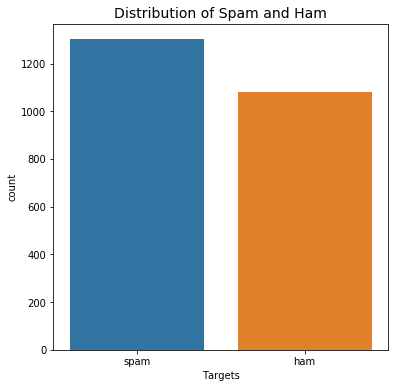

In [309]:
## plot showing the distribution 
plt.figure(figsize=(6,6))
sns.countplot(x = "Targets", data = df)
df.loc[:, 'Targets'].value_counts()
plt.title('Distribution of Spam and Ham', fontsize=14)

'Distribution of length of ham and spam texts are pretty close and  does not provide much clue for classification  '

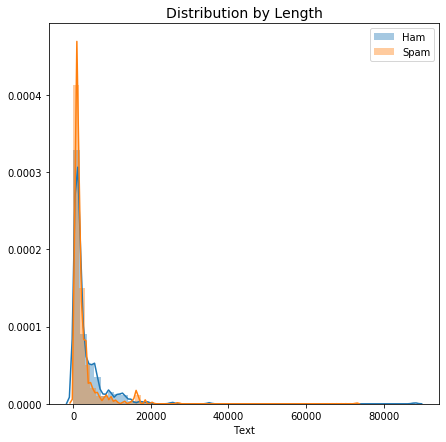

In [310]:
# plot based on the length of the text
plt.figure(figsize=(7,7))
ham =df[df['Targets'] == 'ham']['Text'].str.len()
sns.distplot(ham, label='Ham')
spam = df[df['Targets'] == 'spam']['Text'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length', fontsize = 14)
plt.legend()

'''Distribution of length of ham and spam texts are pretty close and  does not provide much clue for classification  '''

In [311]:
## Common words from the ham emails
text_ham = df[df['Targets']=='ham']["Text"] ## dataframe for ham

## Cleaning the ham text
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
stop_words = set(stopwords.words('english')) ## import stopwords
from nltk.stem import PorterStemmer ## imported the porter stemmer
from nltk.stem import WordNetLemmatizer ## imported wordnet lemmatizer
ps = PorterStemmer()  
wrlm = WordNetLemmatizer()
indx = list(text_ham.index.values)

ham_corp = []
for i in indx:
    updated = re.sub('[^a-zA-Z]', ' ', text_ham[i])
    updated = updated.lower()   
    updated = updated.split()    
    updated = [w for w in updated if not w.lower() in stop_words] ## eliminate stop words
    updated = [ps.stem(w) for w in updated]                       ## stemmed the words
    updated = [wrlm.lemmatize(w) for w in updated]                ## try to consolidate some rootwords
#     print(updated)
#     review = ' '.join(updated)
    ham_corp.append(updated)


In [312]:
## collecting the words from ham texts and finding the word frequency
count_ham = []
for str in ham_corp: 
    for w in str:  
        count_ham.append(w)

ham_counter = Counter(count_ham).most_common(20) ## most common 20 words in ham text
ham_counter = pd.DataFrame.from_dict(ham_counter)
ham_counter = ham_counter.rename(columns={0: "words of ham", 1 : "count"})  


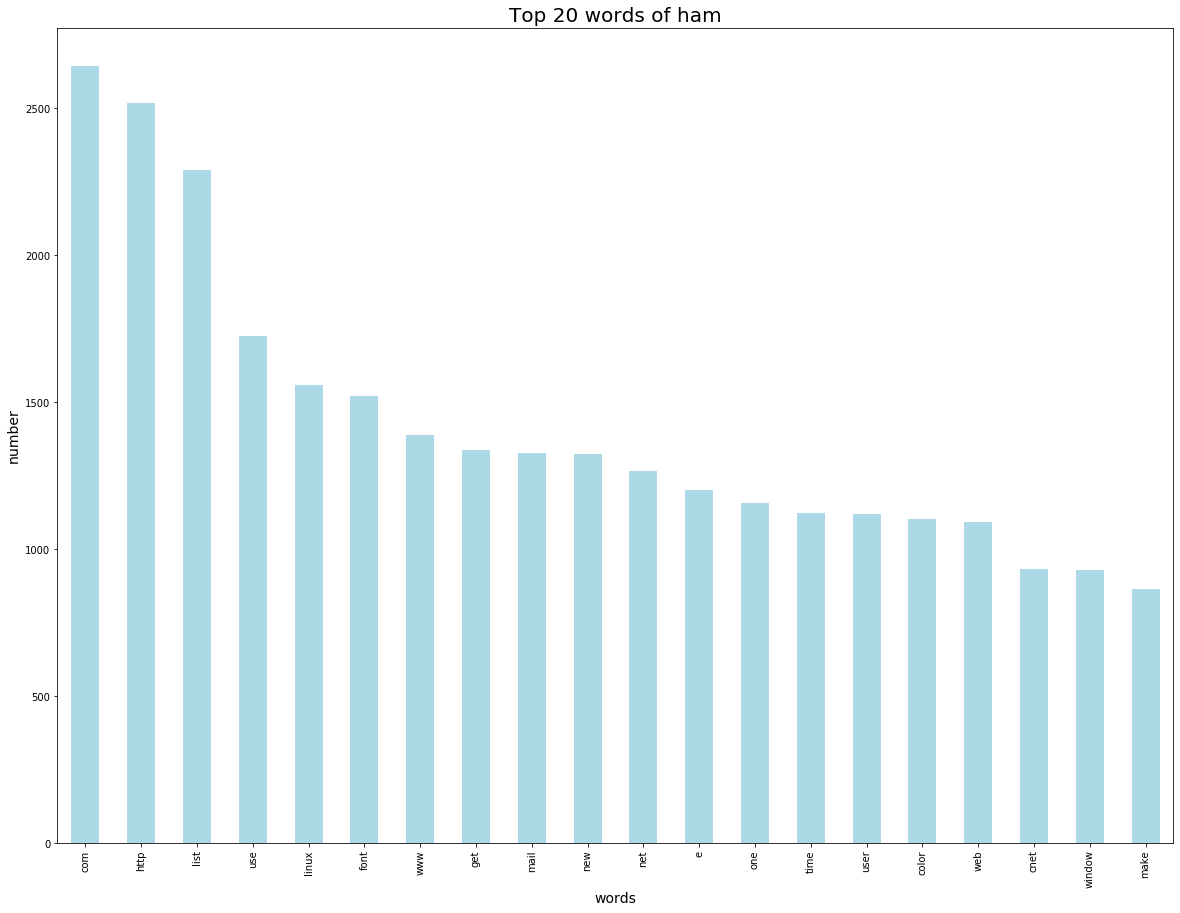

In [313]:
## plot for most common 20 words in ham
ham_counter.plot.bar(legend = False, color = 'lightblue',figsize = (20,15))
y_pos = np.arange(len(ham_counter["words of ham"]))
plt.xticks(y_pos, ham_counter["words of ham"])
plt.title('Top 20 words of ham', fontsize = 20)
plt.xlabel('words', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.show()

**These are very common and short words. Some cases, a single [e] word pops up as most frequent word. This may not contribute much to the classification. However, their frequency matters. However, we will make the call whether to include these short words in the subsequent sections.**

In [314]:
## Common words from the spam emails
text_spam = df[df['Targets']=='spam']["Text"] ## dataframe for ham

## Cleaning the spam text
indx = list(text_spam.index.values)

spam_corp = []
for i in indx:
    updated = re.sub('[^a-zA-Z]', ' ', text_spam[i])
    updated = updated.lower()   
    updated = updated.split()    
    updated = [w for w in updated if not w.lower() in stop_words] ## eliminate stop words
    updated = [ps.stem(w) for w in updated]                       ## stemmed the words
    updated = [wrlm.lemmatize(w) for w in updated]                ## try to consolidate some rootwords
    spam_corp.append(updated)

In [315]:
## collecting the words from spam texts and finding the word frequency
count_spam = []
for str in spam_corp: 
    for w in str:         
        count_spam.append(w)

spam_counter = Counter(count_spam).most_common(20) ## most common 20 words in ham text
spam_counter = pd.DataFrame.from_dict(spam_counter)
spam_counter = spam_counter.rename(columns={0: "words of ham", 1 : "count"})  

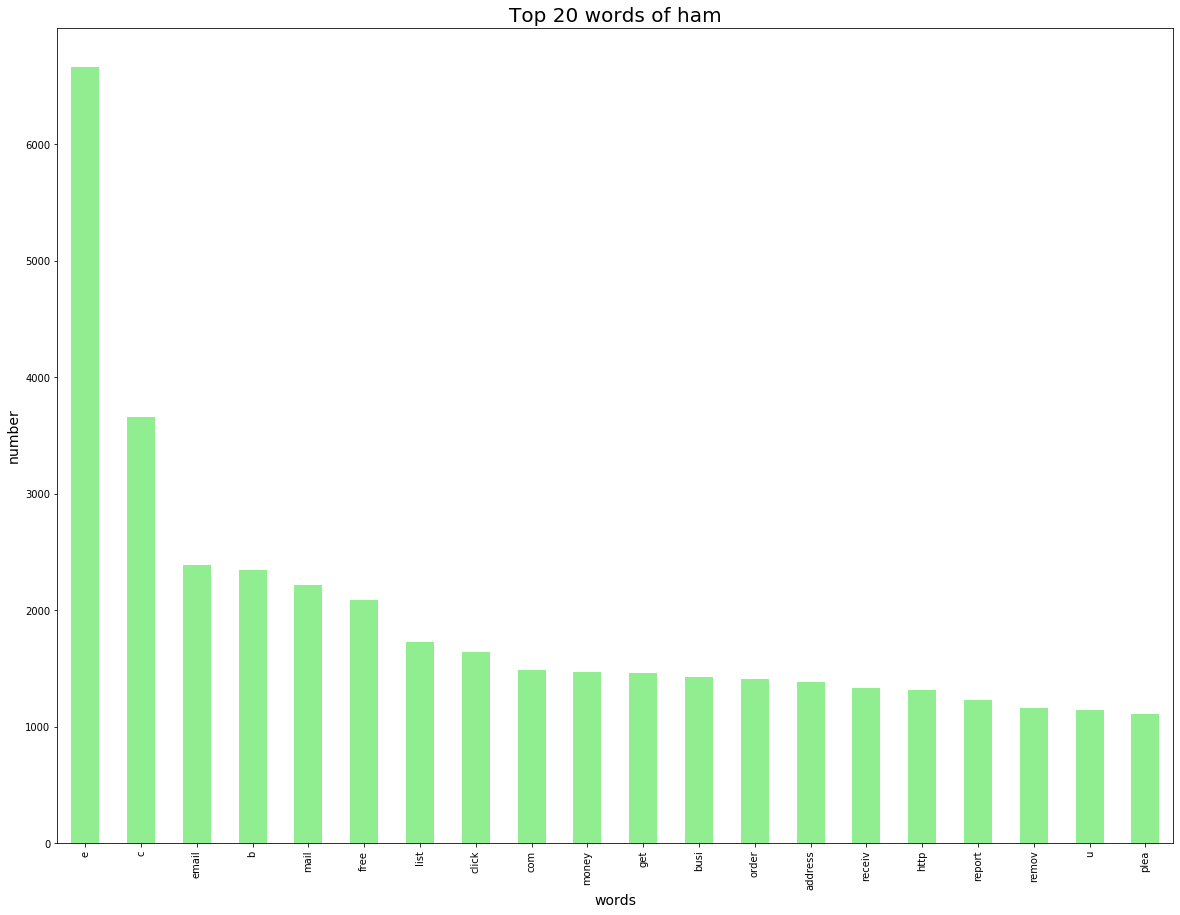

In [316]:
## plot for most common 20 words in sapm
spam_counter.plot.bar(legend = False, color = 'lightgreen',figsize = (20,15))
y_pos = np.arange(len(spam_counter["words of ham"]))
plt.xticks(y_pos, spam_counter["words of ham"])
plt.title('Top 20 words of ham', fontsize = 20)
plt.xlabel('words', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.show()

In [317]:
print("Numbers of tokens in the ham text: ", len(count_ham))
print('-'*75)
print("Numbers of tokens in the spam text: ", len(count_spam))

Numbers of tokens in the ham text:  328153
---------------------------------------------------------------------------
Numbers of tokens in the spam text:  264228


**Top 20 common words for ham and spam texts have many overlaps such as http, list, get, com, etc. Moreover, many single words appear in the most frequent word list. Therefore, these common words will not help us much in classification besides the frequency. We understand that the frequency plays a vital role in specifying the probability in multinomial model. But we would like to see variation in the words as it would assist in solving the classification faster and more accurately.**

**Therefore, Our next approach is not to consider madium and long words with length 6 and above.**

In [318]:
## collecting the words from ham texts and finding the word frequency
count_ham2 = []
for str in ham_corp: 
    for w in str:       
        ''' adding additional creteria for word length'''
        if len(w) > 6: 
            count_ham2.append(w)

ham_counter2 = Counter(count_ham2).most_common(20) ## most common 20 words in ham text
ham_counter2 = pd.DataFrame.from_dict(ham_counter2)
ham_counter2 = ham_counter2.rename(columns={0: "words of ham", 1 : "count"})  

In [319]:
print('Numbers of words: ', len(count_ham2))
print('-'*50)
ham2_set = set(count_ham2)
print('Numbers of unique words: ', len(ham2_set))
print('-'*50)
print(ham_counter2)

Numbers of words:  70443
--------------------------------------------------
Numbers of unique words:  5920
--------------------------------------------------
    words of ham  count
0        network    812
1        product    743
2       download    719
3      subscript    645
4       listinfo    615
5        softwar    609
6        compani    567
7        address    563
8      microsoft    541
9       internet    494
10     technolog    487
11    lockergnom    484
12       mailman    462
13       develop    458
14    sourceforg    438
15  spamassassin    432
16      newslett    422
17       support    419
18       program    409
19       problem    403


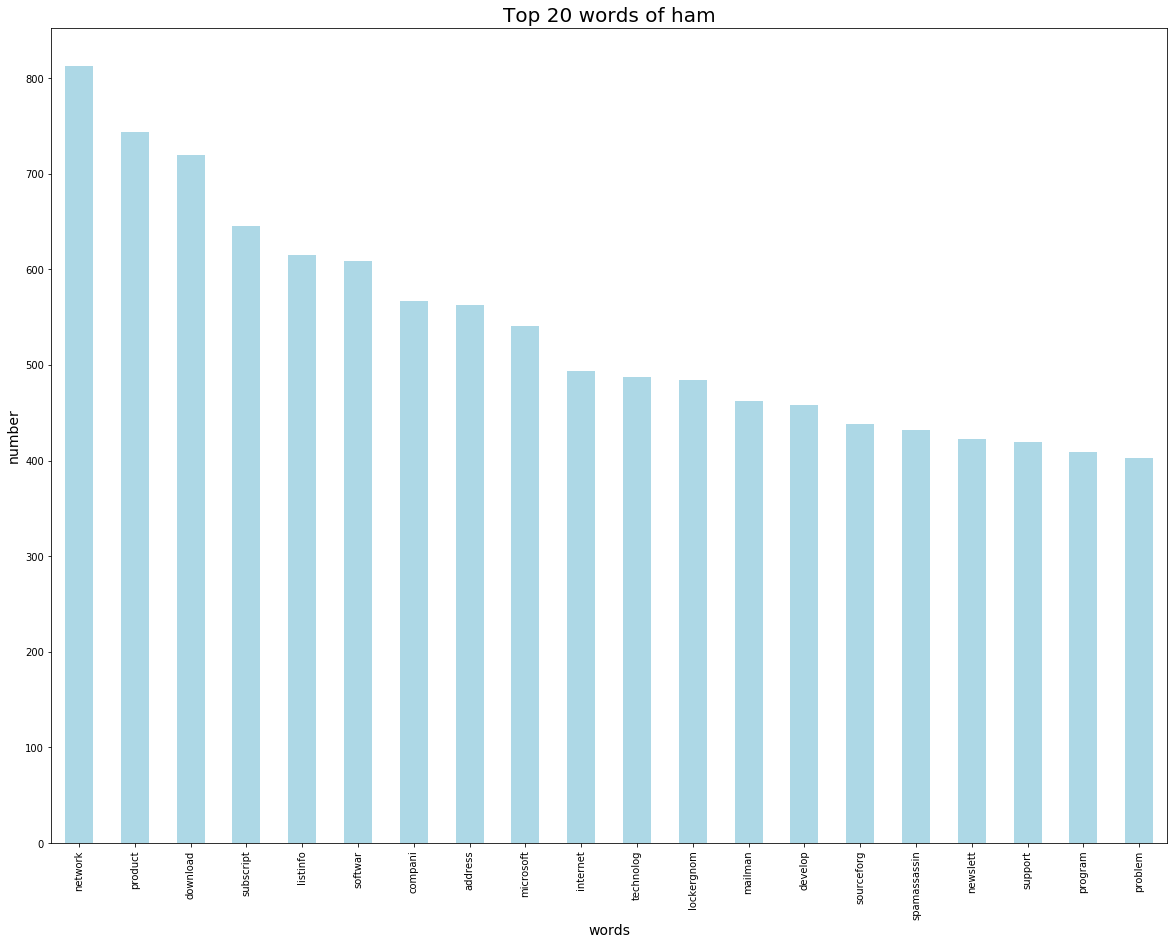

In [320]:
## plot for most common 20 words in ham
ham_counter2.plot.bar(legend = False, color = 'lightblue',figsize = (20,15))
y_pos = np.arange(len(ham_counter2["words of ham"]))
plt.xticks(y_pos, ham_counter2["words of ham"])
plt.title('Top 20 words of ham', fontsize = 20)
plt.xlabel('words', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.show()

In [321]:
## collecting the words from spam texts and finding the word frequency
count_spam2 = []
for str in spam_corp: 
    for w in str:    
        ''' adding additional creteria for word length'''
        if len(w) > 6: 
            count_spam2.append(w)

spam_counter2 = Counter(count_spam2).most_common(20) ## most common 20 words in ham text
spam_counter2 = pd.DataFrame.from_dict(spam_counter2)
spam_counter2 = spam_counter2.rename(columns={0: "words of ham", 1 : "count"})  

In [322]:
print('Numbers of words: ', len(count_spam2))
print('-'*50)
spam2_set = set(count_spam2)
print('Numbers of unique words: ', len(spam2_set))
print('-'*50)
print(spam_counter2)

Numbers of words:  49842
--------------------------------------------------
Numbers of unique words:  4623
--------------------------------------------------
    words of ham  count
0        address   1383
1        program   1039
2        compani    722
3       internet    682
4        million    579
5        contact    437
6        product    436
7        softwar    425
8        special    422
9       advertis    415
10      interest    406
11       complet    404
12    unsubscrib    399
13      guarante    369
14      opportun    366
15  spamassassin    350
16      instruct    327
17       respons    317
18       purchas    301
19       account    289


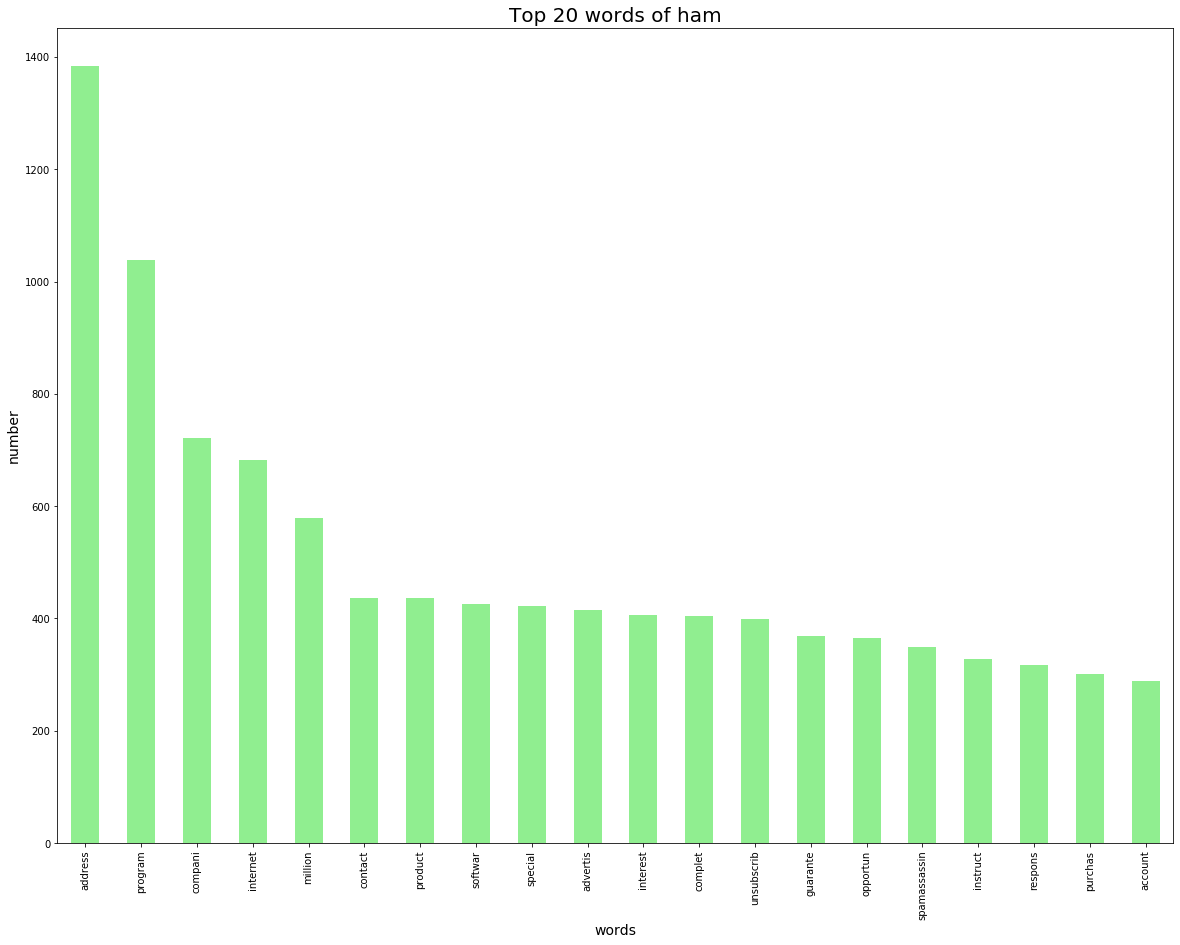

In [323]:
## plot for most common 20 words in sapm
spam_counter2.plot.bar(legend = False, color = 'lightgreen',figsize = (20,15))
y_pos = np.arange(len(spam_counter2["words of ham"]))
plt.xticks(y_pos, spam_counter2["words of ham"])
plt.title('Top 20 words of ham', fontsize = 20)
plt.xlabel('words', fontsize = 14)
plt.ylabel('number', fontsize = 14)
plt.show()

In [324]:
print('After eliminating short words ..........')
print("Numbers of tokens in the ham text: ", len(count_ham2))
print('-'*50)
print("Numbers of tokens in the spam text: ", len(count_spam2))

After eliminating short words ..........
Numbers of tokens in the ham text:  70443
--------------------------------------------------
Numbers of tokens in the spam text:  49842


**Now, we can clearly see that the variety and difference in top 20 words between ham and spam words. These variations will help not only in faster and accurate computation, but also in eliminating unnecessary words which may clutter our accuracy.**

**Therefore, our strategy will be to build the model using only medium and long words.**

In [325]:
# Function to convert  
def listToString(s):     
    # initialize an empty string
    str1 = " "     
    # return string  
    return (str1.join(s))

In [326]:
## Creating dataframe with targets and data
df = {'Targets':targets,'Text':data}
df = pd.DataFrame(df)

In [327]:
## Cleaning df text 

df_cleaned = df

for i in range(len(df[['Targets']])):
    updated = re.sub('[^a-zA-Z]', ' ', df['Text'][i])
    updated = updated.lower()
    updated = updated.split()
    updated = [w for w in updated if not w.lower() in stop_words] ## eliminate stop words
    updated = [ps.stem(w) for w in updated]                       ## stemmed the words
    updated = [wrlm.lemmatize(w) for w in updated]                ## try to consolidate some rootwords
    updated_rev = []
    for w in updated: 
        ''' adding additional creteria for word length'''
        if len(w) > 6: 
            updated_rev.append(w)
    updated_str = listToString(updated_rev)                       ## Converted back to string 
    df_cleaned.loc[i,'Text'] = updated_str

In [328]:
print(df_cleaned)

     Targets                                               Text
0       spam  ensurin financi compani countri coverag reques...
1       spam  adclick guarante adclick support adclick faste...
2       spam  adclick guarante adclick support adclick faste...
3       spam  membership instant password spamassassin passw...
4       spam  thought guarante freeyanke freeyanke support f...
...      ...                                                ...
2376     ham  technolog newslett verdana courier monospac ve...
2377     ham  institut parkway investor increas constraint a...
2378     ham  geocach shellyfish geocach geocach organiz geo...
2379     ham  virtual hostnam calendar transact request comm...
2380     ham  clariti popular develop javaserv bergsten comp...

[2381 rows x 2 columns]


In [329]:
## Creating training and test data using KFold
from sklearn.model_selection import StratifiedKFold, KFold

cv = KFold(n_splits=10,shuffle=True,random_state=22)

X = df_cleaned['Text']
y = df_cleaned['Targets']

for train, test in cv.split(X,y):
    X_train = X.iloc[train] 
    X_test  = X.iloc[test] 
    y_train = y[train]
    y_test  = y[test] 
    
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  2143
X_test:  238
y_train:  2143
y_test:  238


In [330]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 4000, lowercase = False)
cv.fit(X_train)

CountVectorizer(lowercase=False, max_features=4000)

In [331]:
X_train_cv = cv.transform(X_train)
X_train_cv

<2143x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 62007 stored elements in Compressed Sparse Row format>

In [332]:
# pd.DataFrame(matrix, columns=columns)
dfsp = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
print(dfsp.head(5))
print('='*100)
print('Size of the training Matrix: ', dfsp.shape)
'''it is a very sparse matrix with 4000 features'''

   aaliyah  abandon  abbestellen  abidjan  abmelden  abnegateal  abonnieren  \
0        0        0            0        0         0           0           0   
1        0        0            0        0         0           0           0   
2        0        0            0        0         0           0           0   
3        0        0            0        0         0           0           0   
4        0        0            0        0         0           0           0   

   aborigin  absolut  absoluten  ...  zhongshan  zhoster  zimbabw  zonealarm  \
0         0        0          0  ...          0        0        0          0   
1         0        0          0  ...          0        0        0          0   
2         0        0          0  ...          0        0        0          0   
3         0        2          0  ...          0        0        0          0   
4         0        0          0  ...          0        0        0          0   

   ztzfjbpyopum  zugestellt  zwischen  zzxjp

'it is a very sparse matrix with 4000 features'

In [333]:
X_test_cv = cv.transform(X_test)
X_test_cv

<238x4000 sparse matrix of type '<class 'numpy.int64'>'
	with 5774 stored elements in Compressed Sparse Row format>

In [334]:
%%time
## Naive bayes classification using Multinomial 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

mnb = MultinomialNB(alpha = 0.5)  ## alpha - laplace smoothing parameter
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)

Wall time: 5.96 ms


In [335]:
print('Naive Bayes Accuracy: ', "{:.2%}".format(accuracy_score( y_mnb , y_test)))
print('-'*50)
print("Naive Bayes confusion_matrix:\n",confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  97.48%
--------------------------------------------------
Naive Bayes confusion_matrix:
 [[107   5]
 [  1 125]]


In [336]:
%%time
## Cross checking with Naive bayes classification using Bernoulli (it is also suitable for discrete and binary classification)
# we set up the model with different binarizer 
from sklearn.naive_bayes import BernoulliNB
print("Binarizer and Accuracy \n", "--------------------" ) 
for i in np.arange(0.1, 1.1, 0.1):    
    bnb = BernoulliNB(alpha= 0.5 , binarize = i).fit(X_train_cv, y_train)
    y_bnb = bnb.predict(X_test_cv)    
    print('Binarizer: ', round(i,2),  ' | ', 'Accuracy: ', "{:.2%}".format(accuracy_score( y_mnb , y_test)))
    
'''Binarizer does not have any impact on classification in this case'''

Binarizer and Accuracy 
 --------------------
Binarizer:  0.1  |  Accuracy:  97.48%
Binarizer:  0.2  |  Accuracy:  97.48%
Binarizer:  0.3  |  Accuracy:  97.48%
Binarizer:  0.4  |  Accuracy:  97.48%
Binarizer:  0.5  |  Accuracy:  97.48%
Binarizer:  0.6  |  Accuracy:  97.48%
Binarizer:  0.7  |  Accuracy:  97.48%
Binarizer:  0.8  |  Accuracy:  97.48%
Binarizer:  0.9  |  Accuracy:  97.48%
Binarizer:  1.0  |  Accuracy:  97.48%
Wall time: 68.8 ms


'Binarizer does not have any impact on classification in this case'

In [337]:
%%time
## Cross checking with logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score 
from sklearn import metrics as mt

print("C and Accuracy \n", "--------------------" ) 
for i in np.arange(1, 2.1, 0.1):  
    accu = []
    Logistic_model = LogisticRegression(penalty='l2', solver='liblinear', C = i, random_state = 25).fit(X_train_cv, y_train)
    accuracies = cross_val_score(Logistic_model, X_test_cv, y=y_test) 
    accu.append(accuracies)
    t = 0   
    l = len(accu[0])
    for a in accu[0]:        
        t = t + a              
#     print("C and Accuracy \n", "--------------------" )        
    print('C: ', round(i,2),  ' | ', 'Accuracy: ', round((t/l),4))
    
'''Logistic Regression accuracy is far below compared to those of Naive Bayes (Multinomial and Bernoulli)'''   
'''In addition, Logistic Regression takes more time'''

C and Accuracy 
 --------------------
C:  1.0  |  Accuracy:  0.8486
C:  1.1  |  Accuracy:  0.8486
C:  1.2  |  Accuracy:  0.8486
C:  1.3  |  Accuracy:  0.8486
C:  1.4  |  Accuracy:  0.8486
C:  1.5  |  Accuracy:  0.8486
C:  1.6  |  Accuracy:  0.8443
C:  1.7  |  Accuracy:  0.8443
C:  1.8  |  Accuracy:  0.8443
C:  1.9  |  Accuracy:  0.8443
C:  2.0  |  Accuracy:  0.8443
Wall time: 486 ms


'In addition, Logistic Regression takes more time'

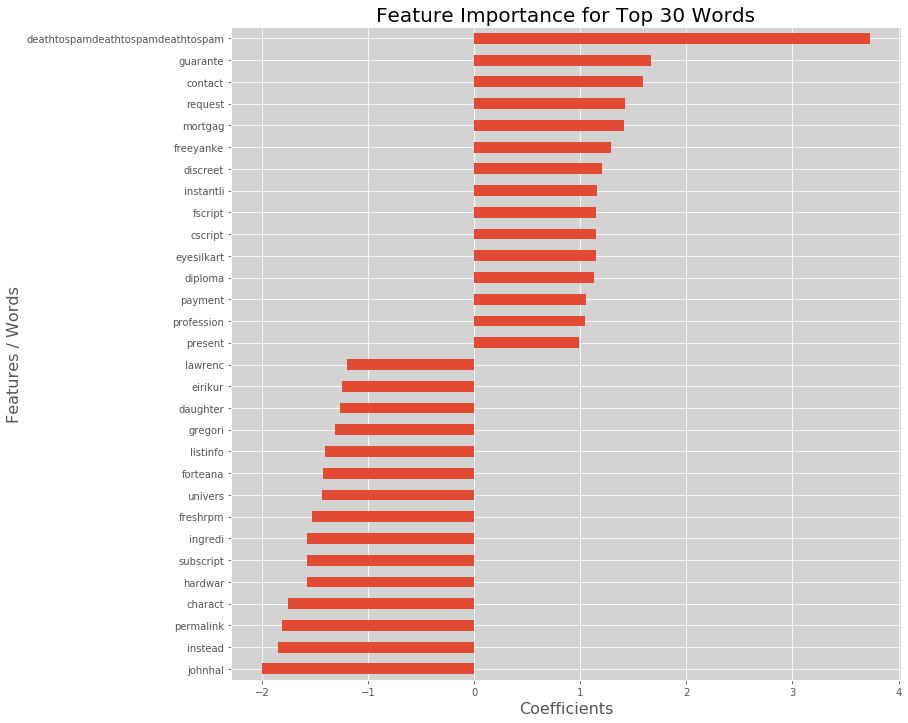

In [397]:
## Feature Importance based on the Logistic Regression model 
'''Naiva Bayes models do not provide the feature importance, but the logistic regression does '''

coeffs = Logistic_model.coef_.tolist()
column_names=cv.get_feature_names()
feature_weights_top = pd.Series(coeffs[0],index=column_names).sort_values(ascending=True).head(n =15)
feature_weights_bot = pd.Series(coeffs[0],index=column_names).sort_values(ascending=False).head(n = 15)
combined_feature_wts_high = [feature_weights_top , feature_weights_bot]
combined_feature_wts_high = pd.concat(combined_feature_wts_high).sort_values(ascending=True)
plt.style.use('ggplot')
plt.figure(figsize=(12,12))
combined_feature_wts_high.plot(kind='barh').patch.set_facecolor('lightgrey')
plt.ylabel("Features / Words", fontsize=16)
plt.xlabel("Coefficients", fontsize=16)
plt.title('Feature Importance for Top 30 Words', fontsize=20)
plt.show()

### References

[1] MailCleaner. *What's the Origin of the Word 'Spam'?* https://www.mailcleaner.net/blog/spam-world-news/whats-the-origin-of-the-word-spam

[2] Spam Laws. *Spam Statsitics and Facts* https://spamlaws.com/spam-stats.html